# D208 Task 2: Logistic Regression

## Andrew Grofe

### Professor Straw

## A1: Research Question

What variables are most directly linked to a customer's likelihood to churn?

## A2: Goals of Analysis

With the above stated research question, our goal for the business is to determine which variables are likely to predict whether a customer will churn or not. This will allow the business to craft go-to-market strategies around these predictor variables to try and retain customers. During this assignment, we will be using logistic regression to ultimately answer the research question.

## B1: Assumptions of a Logistic Regression Model

1. The response variable is binary in nature (i.e. True/False, Yes/No, Either/Or). There must only be two unique values for this response variable.
2. Similar to linear regression, none of the independent or explanatory variables should be significantly correlated with each other (i.e. no multicollinearity).
3. There is a linear relationship between the logit of the response variable and the explanatory variables.
4. There are no extreme outliers so that the regression line is not dragged down by the extremes on each end.

## B2: Benefits of Chosen Tools

As with previous assignments, I have previous experience with Python which is why I have chosen to use it for all of the assignments where it fits. It is well documented and has several packages that are great for allowing us to inspect, manipulate, transform, and analyze data sets.

Some of the packages that I intend to use for this analysis include:

1. Pandas for its usability with data frames.
2. Seaborn for its extensive visualization capabilities for both univariate and bivariate analysis.
3. Sklearn for its ability to perform principal-component-analysis and help with reducing the model, as well as any other needed transformations.
4. Statsmodels for its ability to easily build logistic regression models

## B3: Justification of Logistic Regression

For this assignment, we are inspecting a binary variable ("Churn") to determine how it is impacted by other explanatory variables. These explanatory variables will be both continuous and categorical in nature.

Using the statsmodels package with logit will allow us to run multiple logistic regressions until we get to a reduced model that shows the relationship between our target variable and other independent variables at an acceptable level of statistical significance.

Using logistic regression fits because of the nature of our response and explanatory variables. It will provide the business with potential suggestions on how to go about retaining more customers.

## C1: Goals of Data Preparation

As with any data analysis project we need to make sure our data is cleaned and prepared for an analysis. Without clean data, the results of the analysis could be affected and lead to skewed results.

First we are going to use Panda's .read_csv() function to read the provided data set into a dataframe. Working from a dataframe allows us to easily inspect, manipulate, and transform the data as we need.

After loading into a dataframe, we will want to check for duplicates in the data. This can be done using the .duplicated() function, which returns "True" if there is a match on the column we are observing. For this analysis, it will make most sense to use the CaseOrder column which, according to the data dictionary, is a unique identifier for each customer.

Next we will want to check for null values using the .isnull() function. If there are null values we will need to decide whether to remove the rows entirely, or fill the column with a reasonable value (i.e. mean of the column, etc.).

We can then drop columns from the data that we don't want to include in our logistic regression models. Similar to Task 1 of this course, I will be using a "kitchen-sink" method to select variables that I think will be interesting for the analysis. I am doing this to be able to reuse existing logic and code from Task 1. Because of this, I will try to limit the number of variables I include in the initial model compared to my Task 1 submission. With logistic regression, there is more of a concern in regards to overfitting. We want to aim for the highest AUC possible, but with the least amount of variables in order to create a more accurate model.

After this, we will need to check for outliers. This needs to be done for all data analysis projects, but it can have a big impact on logistic regression as it could potentially move the regression line, skewing the model's ability to predict the response variable.

In the previous assignment, I went about encoding the dummy variables in a complicated manner. It will suffice to use panda's .get_dummies function which will one hot encode our categorical variables. In order to effectively use these, we will need to include k-1 columns in our model. This will result in a column being dropped and the remaining column(s) representing the variable's original name, followed by the categorical (i.e. Gender -> Gender_F and Gender_M is dropped from the variable set). I put more effort into understanding this for this submission and got assistance from __[Sharpsight Labs: Panda's Get Dummies](https://www.sharpsightlabs.com/blog/pandas-get-dummies/)__.

After going through these steps and ensuring all of our data is logical and clean, we will print the dataframe to a new CSV file for later use. However, at this point we will be able to begin our multiple logistic regression.

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Creating the data frame and importing the provided churn data set
df = pd.read_csv(r"C:\Users\agrof\D208\churn_clean.csv", sep = ",", na_values = "None")
# Check data types and number of values, as well as overall size of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [2]:
# Checking for duplicates
duplicates = df['CaseOrder'].duplicated()
duplicates.value_counts()

CaseOrder
False    10000
Name: count, dtype: int64

In [3]:
# Checking for null values across the data frame
null_values = df.isnull().sum()
print(null_values)

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

In [4]:
# Filling null-values in InternetService column
df['InternetService'].fillna(value='None', inplace=True)

In [5]:
# Rechecking for null values
null_values = df.isnull().sum()
print(null_values)

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [6]:
df_logistic = df.drop(columns = ['CaseOrder','Customer_id','Interaction','UID','City','County',
                                 'Zip','Lat','Lng','Job','Email','Contacts','Contract','PaperlessBilling','PaymentMethod',
                                'Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8',
                                'Techie','Port_modem','Phone','Multiple','TimeZone','State'])

In [7]:
df_logistic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  int64  
 1   Area                  10000 non-null  object 
 2   Children              10000 non-null  int64  
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Marital               10000 non-null  object 
 6   Gender                10000 non-null  object 
 7   Churn                 10000 non-null  object 
 8   Outage_sec_perweek    10000 non-null  float64
 9   Yearly_equip_failure  10000 non-null  int64  
 10  Tablet                10000 non-null  object 
 11  InternetService       10000 non-null  object 
 12  OnlineSecurity        10000 non-null  object 
 13  OnlineBackup          10000 non-null  object 
 14  DeviceProtection      10000 non-null  object 
 15  TechSupport         

## C2: Summary Statistics

Below are the summary statistics for all of our variables, starting with the dependant variable "Churn." We then follow this up with all of the independent variables we plan to include in our initial model.


In [8]:
churn_count = df_logistic.Churn.value_counts()
print(churn_count)

Churn
No     7350
Yes    2650
Name: count, dtype: int64


In [9]:
df_logistic.Population.describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

In [10]:
df_logistic.Area.value_counts()

Area
Suburban    3346
Urban       3327
Rural       3327
Name: count, dtype: int64

In [11]:
df_logistic.Children.value_counts().sort_index()

Children
0     2570
1     2472
2     1495
3     1472
4     1006
5      212
6      187
7      185
8      210
9       92
10      99
Name: count, dtype: int64

In [12]:
df_logistic.Age.describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [13]:
df_logistic.Income.describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [14]:
marry_counts = df_logistic.Marital.value_counts()
print(marry_counts)

Marital
Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: count, dtype: int64


In [15]:
df_logistic.Gender.value_counts()

Gender
Female       5025
Male         4744
Nonbinary     231
Name: count, dtype: int64

In [16]:
# Removing rows with non-binary options as the sample is so small and checking to ensure the rows are dropped
df_logistic = df_logistic.drop(df_logistic[df_logistic['Gender'] == 'Nonbinary'].index)
gender_count = df_logistic.Gender.value_counts()
print(gender_count)

Gender
Female    5025
Male      4744
Name: count, dtype: int64


In [17]:
df_logistic.Outage_sec_perweek.describe()

count    9769.000000
mean       10.002745
std         2.981045
min         0.099747
25%         8.017590
50%        10.020310
75%        11.976770
max        21.207230
Name: Outage_sec_perweek, dtype: float64

In [18]:
df_logistic.Yearly_equip_failure.describe()

count    9769.000000
mean        0.395537
std         0.634592
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         6.000000
Name: Yearly_equip_failure, dtype: float64

In [19]:
tablet_counts = df_logistic.Tablet.value_counts()
print(tablet_counts)

Tablet
No     6848
Yes    2921
Name: count, dtype: int64


In [20]:
os_counts = df_logistic.OnlineSecurity.value_counts()
print(os_counts)

OnlineSecurity
No     6272
Yes    3497
Name: count, dtype: int64


In [21]:
ob_counts = df_logistic.OnlineBackup.value_counts()
print(ob_counts)

OnlineBackup
No     5389
Yes    4380
Name: count, dtype: int64


In [22]:
is_counts = df_logistic.InternetService.value_counts()
print(is_counts)

InternetService
Fiber Optic    4307
DSL            3384
None           2078
Name: count, dtype: int64


In [23]:
dp_counts = df_logistic.DeviceProtection.value_counts()
print(dp_counts)

DeviceProtection
No     5472
Yes    4297
Name: count, dtype: int64


In [24]:
ts_counts = df_logistic.TechSupport.value_counts()

In [25]:
stv_counts = df_logistic.StreamingTV.value_counts()
print(stv_counts)

StreamingTV
No     4959
Yes    4810
Name: count, dtype: int64


In [26]:
sm_counts = df_logistic.StreamingMovies.value_counts()
print(sm_counts)

StreamingMovies
No     4986
Yes    4783
Name: count, dtype: int64


In [27]:
df_logistic.Tenure.describe()

count    9769.000000
mean       34.570517
std        26.428436
min         1.000259
25%         7.934658
50%        36.880480
75%        61.466500
max        71.999280
Name: Tenure, dtype: float64

In [28]:
df_logistic.MonthlyCharge.describe()

count    9769.000000
mean      172.612818
std        42.955741
min        79.978860
25%       139.979200
50%       167.456419
75%       200.165200
max       290.160419
Name: MonthlyCharge, dtype: float64

In [29]:
df_logistic.Bandwidth_GB_Year.describe()

count    9769.000000
mean     3396.989950
std      2184.275116
min       155.506715
25%      1238.459696
50%      3367.528814
75%      5586.428510
max      7158.981530
Name: Bandwidth_GB_Year, dtype: float64

### Handling Outliers

Below is a function that can be used to calculate all of the outliers for our numeric variables. In order to prevent our logistic regression line from being pulled down or up, we want to remove all outliers for the analysis.

The function is using the inter-quartile range method, and was used in my previous submissions for data cleaning and eploratory data analysis (D206 and D207).

In [30]:
# Method for calculating outliers in quantitative data sets
def find_outliers(df) :
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df < lower_bound) | (df > upper_bound)]
    return outliers

In [31]:
# Finding outliers
pop_outliers = find_outliers(df_logistic['Population'])
pop_count = len(find_outliers(df_logistic['Population']))
print(pop_outliers)
print(f'Total outliers: {pop_count}')

11      33372
16      50079
29      52484
44      35743
51      39649
        ...  
9936    38703
9979    32425
9987    87509
9996    77168
9998    35575
Name: Population, Length: 905, dtype: int64
Total outliers: 905


In [32]:
# Dropping rows with outliers
df_logistic = df_logistic.drop(pop_outliers.index)

In [33]:
# Finding outliers
child_outliers = find_outliers(df_logistic['Children'])
child_count = len(find_outliers(df_logistic['Children']))
print(child_outliers)
print(f'Total outliers: {child_count}')

30       9
97      10
131      8
144     10
145      8
        ..
9822     8
9860     8
9871    10
9901     9
9946     8
Name: Children, Length: 355, dtype: int64
Total outliers: 355


In [34]:
# Dropping rows with outliers
df_logistic = df_logistic.drop(child_outliers.index)

In [35]:
# Finding outliers
age_outliers = find_outliers(df_logistic['Age'])
age_count = len(find_outliers(df_logistic['Age']))
print(age_outliers)
print(f'Total outliers: {age_count}')

Series([], Name: Age, dtype: int64)
Total outliers: 0


In [36]:
# Dropping rows with outliers
df_logistic = df_logistic.drop(age_outliers.index)

In [37]:
# Finding outliers
outage_outliers = find_outliers(df_logistic['Outage_sec_perweek'])
outage_count = len(find_outliers(df_logistic['Outage_sec_perweek']))
print(outage_outliers)
print(f'Total outliers: {outage_count}')

220     18.195425
438     18.395378
527     19.071806
547     18.307174
761     18.303696
          ...    
8508     1.450880
8539    19.657110
8873     2.015143
8968    19.209690
9402     0.827544
Name: Outage_sec_perweek, Length: 63, dtype: float64
Total outliers: 63


In [38]:
# Dropping rows with outliers
df_logistic = df_logistic.drop(outage_outliers.index)

In [39]:
# Finding outliers
outage_outliers = find_outliers(df_logistic['Outage_sec_perweek'])
print(outage_outliers)

136      2.120351
2225     2.096375
2508     2.094319
3499    17.905950
7894    17.861530
7908    17.912390
Name: Outage_sec_perweek, dtype: float64


In [40]:
# Finding rows with outliers
failure_outliers = find_outliers(df_logistic['Yearly_equip_failure'])
failure_count = len(find_outliers(df_logistic['Yearly_equip_failure']))
print(failure_outliers)
print(f'Total outliers: {failure_count}')

20      3
697     3
710     3
857     3
1108    3
       ..
9422    3
9583    3
9763    4
9769    3
9967    3
Name: Yearly_equip_failure, Length: 79, dtype: int64
Total outliers: 79


In [41]:
# Dropping rows with outliers
df_logistic = df_logistic.drop(failure_outliers.index)

In [42]:
# Finding outliers
tenure_outliers = find_outliers(df_logistic['Tenure'])
print(tenure_outliers)

Series([], Name: Tenure, dtype: float64)


In [43]:
# Finding outliers
charge_outliers = find_outliers(df_logistic['MonthlyCharge'])
print(charge_outliers)

Series([], Name: MonthlyCharge, dtype: float64)


In [44]:
# Finding outliers
bw_outliers = find_outliers(df_logistic['Bandwidth_GB_Year'])
print(bw_outliers)

Series([], Name: Bandwidth_GB_Year, dtype: float64)


In [45]:
# Inspecting dataframe to make sure outliers were removed
df_logistic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8367 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            8367 non-null   int64  
 1   Area                  8367 non-null   object 
 2   Children              8367 non-null   int64  
 3   Age                   8367 non-null   int64  
 4   Income                8367 non-null   float64
 5   Marital               8367 non-null   object 
 6   Gender                8367 non-null   object 
 7   Churn                 8367 non-null   object 
 8   Outage_sec_perweek    8367 non-null   float64
 9   Yearly_equip_failure  8367 non-null   int64  
 10  Tablet                8367 non-null   object 
 11  InternetService       8367 non-null   object 
 12  OnlineSecurity        8367 non-null   object 
 13  OnlineBackup          8367 non-null   object 
 14  DeviceProtection      8367 non-null   object 
 15  TechSupport           8367

## C3: Univariate and Bivariate Visualizations

Below are the univariate and bivariate visualizations presented side by side. We compare each independent variable with our dependent variable through a mixture of visualization types (boxplots, histograms, countplots, and violinplots).

Text(0.5, 1.0, 'Pie Chart Churn Distribution')

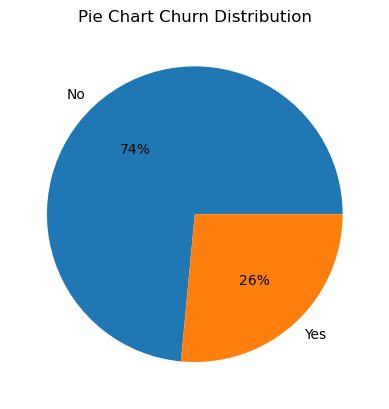

In [46]:
churn_labels = ["No", "Yes"]
plt.pie(churn_count, labels=churn_labels, autopct = '%.0f%%')
plt.title('Pie Chart Churn Distribution')

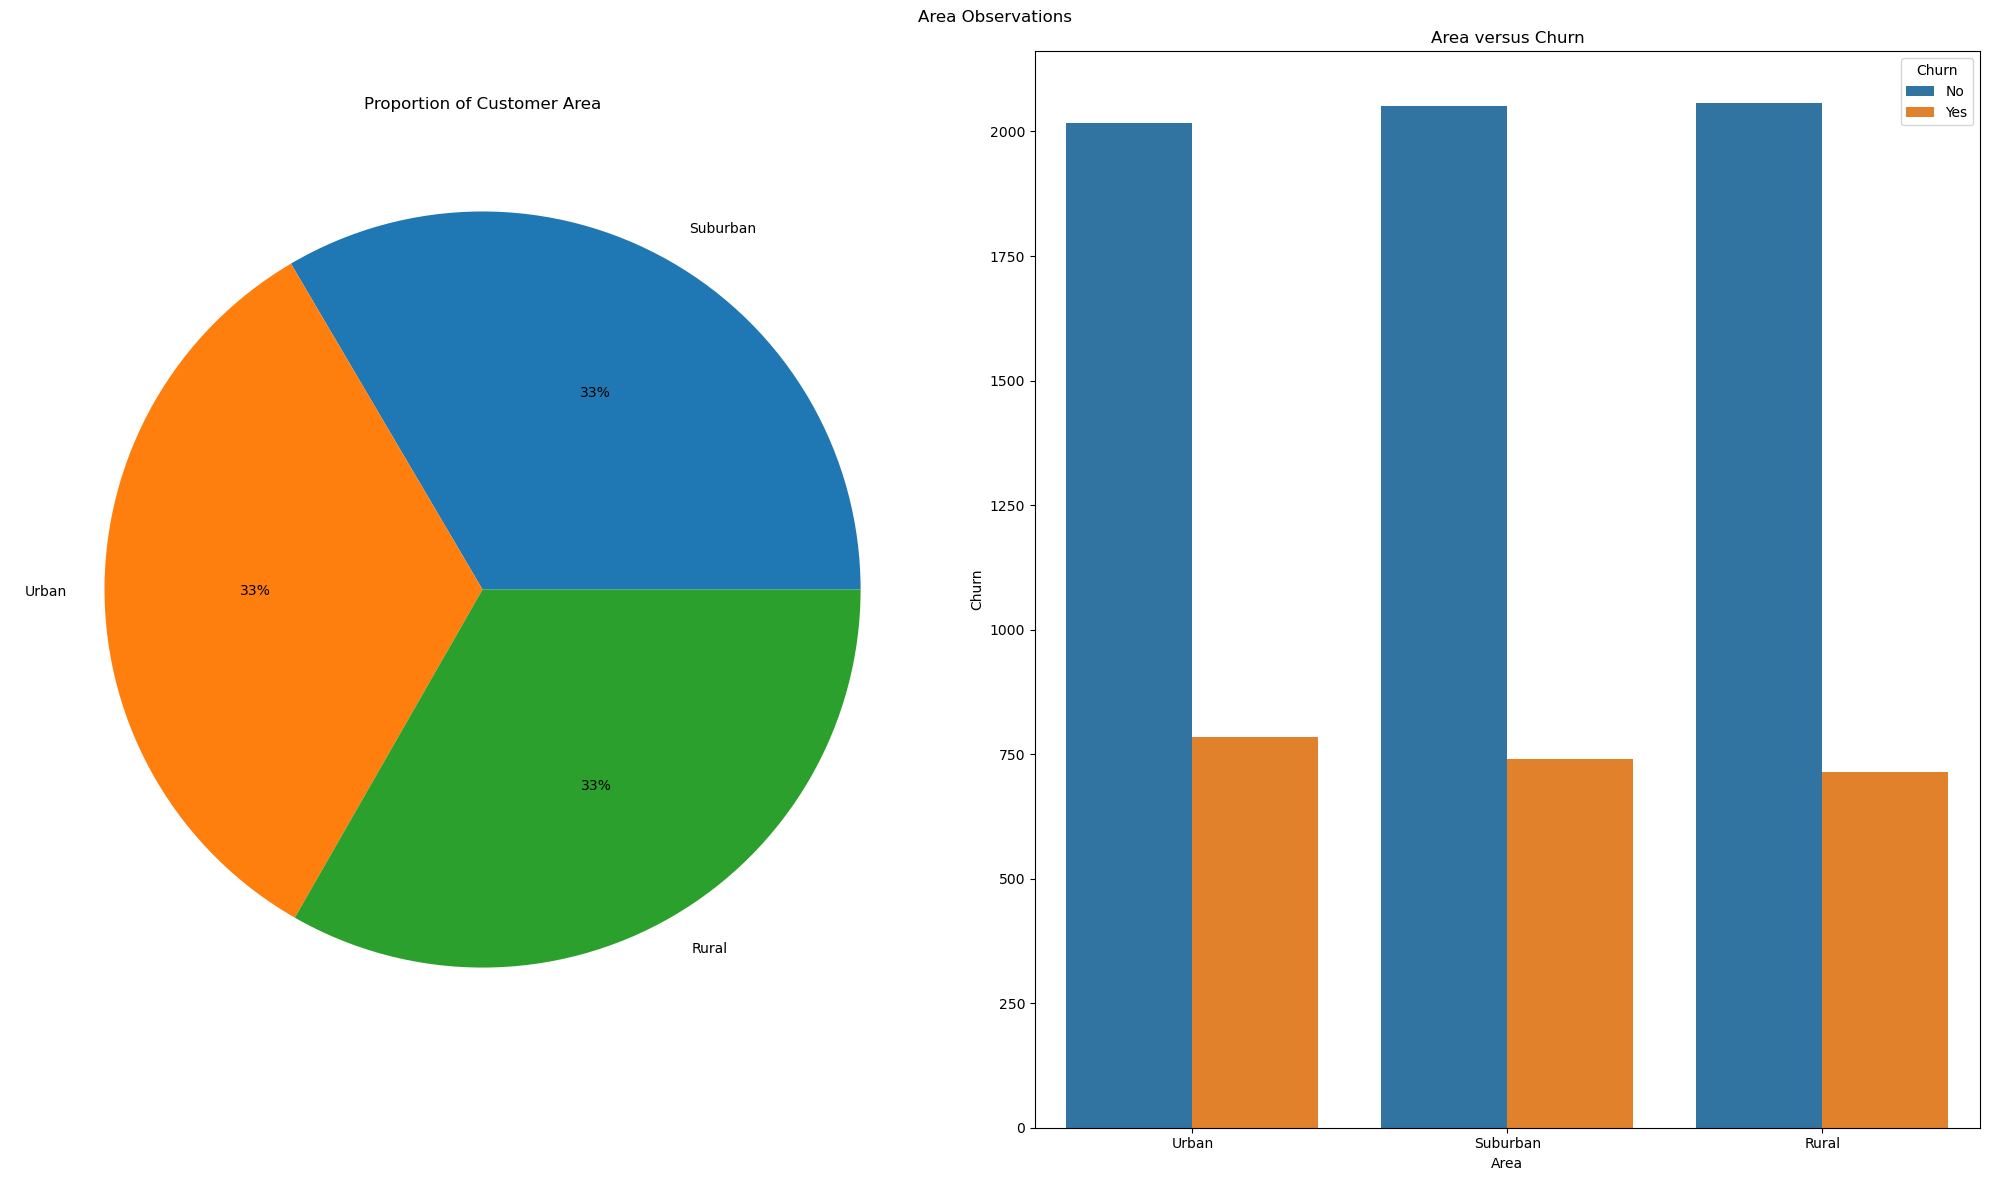

In [47]:
plt.figure(figsize=[20, 12])
plt.suptitle("Area Observations")

# First subplot: Pie chart
plt.subplot(1, 2, 1)
data = [3346, 3327, 3327]
keys = ['Suburban', 'Urban', 'Rural']
plt.pie(data, labels=keys, autopct='%.0f%%')
plt.title('Proportion of Customer Area')

# Second subplot: Count plot
plt.subplot(1, 2, 2)
plt.title("Area versus Churn")
sns.countplot(data=df_logistic, x='Area', hue='Churn')
plt.xlabel("Area")
plt.ylabel("Churn")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

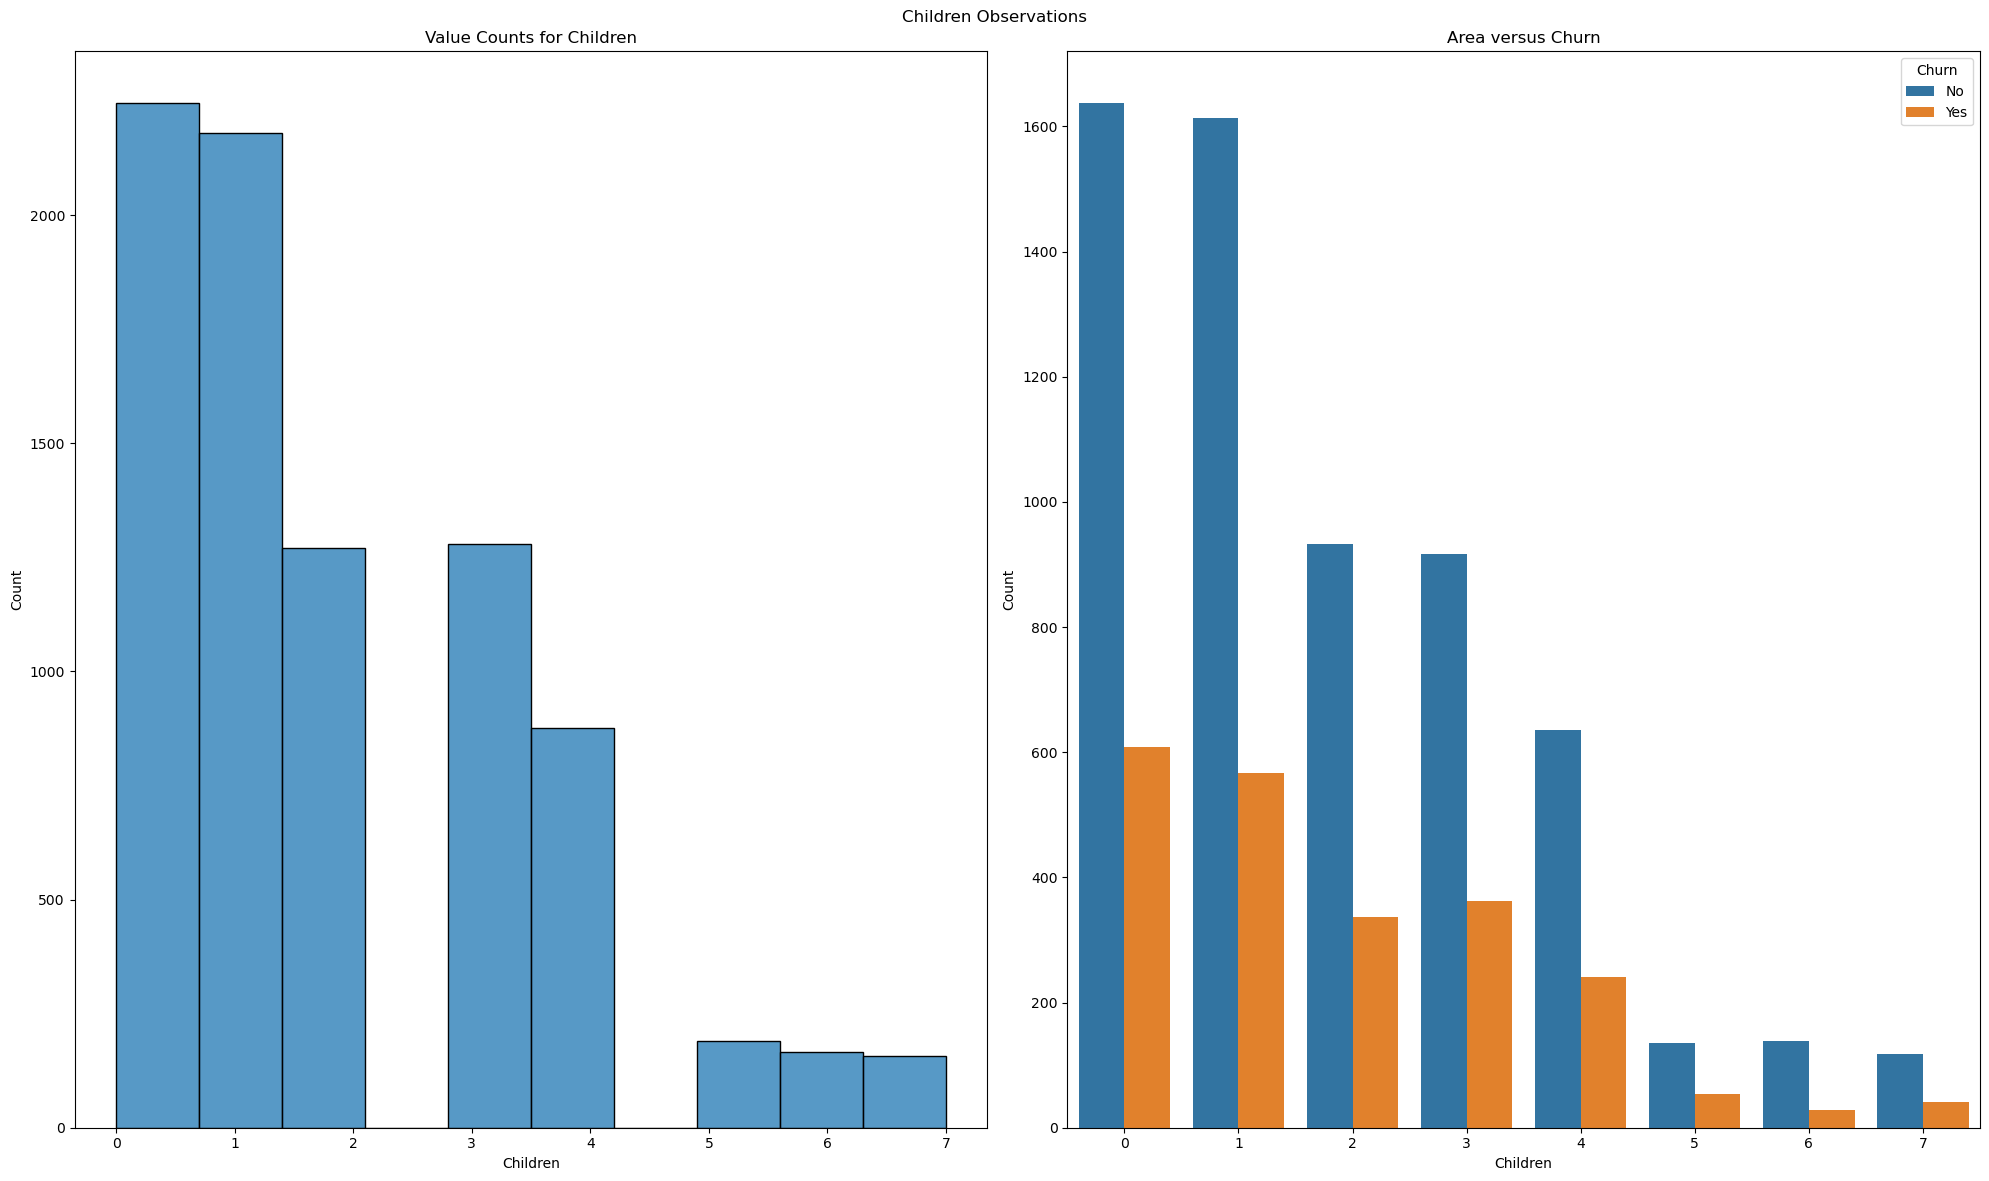

In [48]:
plt.figure(figsize = [20,12])
plt.suptitle("Children Observations")

# First subplot: histogram
plt.subplot(1,2,1)
sns.histplot(data=df_logistic, x = 'Children', bins = 10)
plt.title('Value Counts for Children')
plt.xlabel('Children')
plt.ylabel('Count')


# Second subplot: Count plot
plt.subplot(1, 2, 2)
plt.title("Area versus Churn")
sns.countplot(data=df_logistic, x='Children', hue='Churn')
plt.xlabel("Children")
plt.ylabel("Count")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

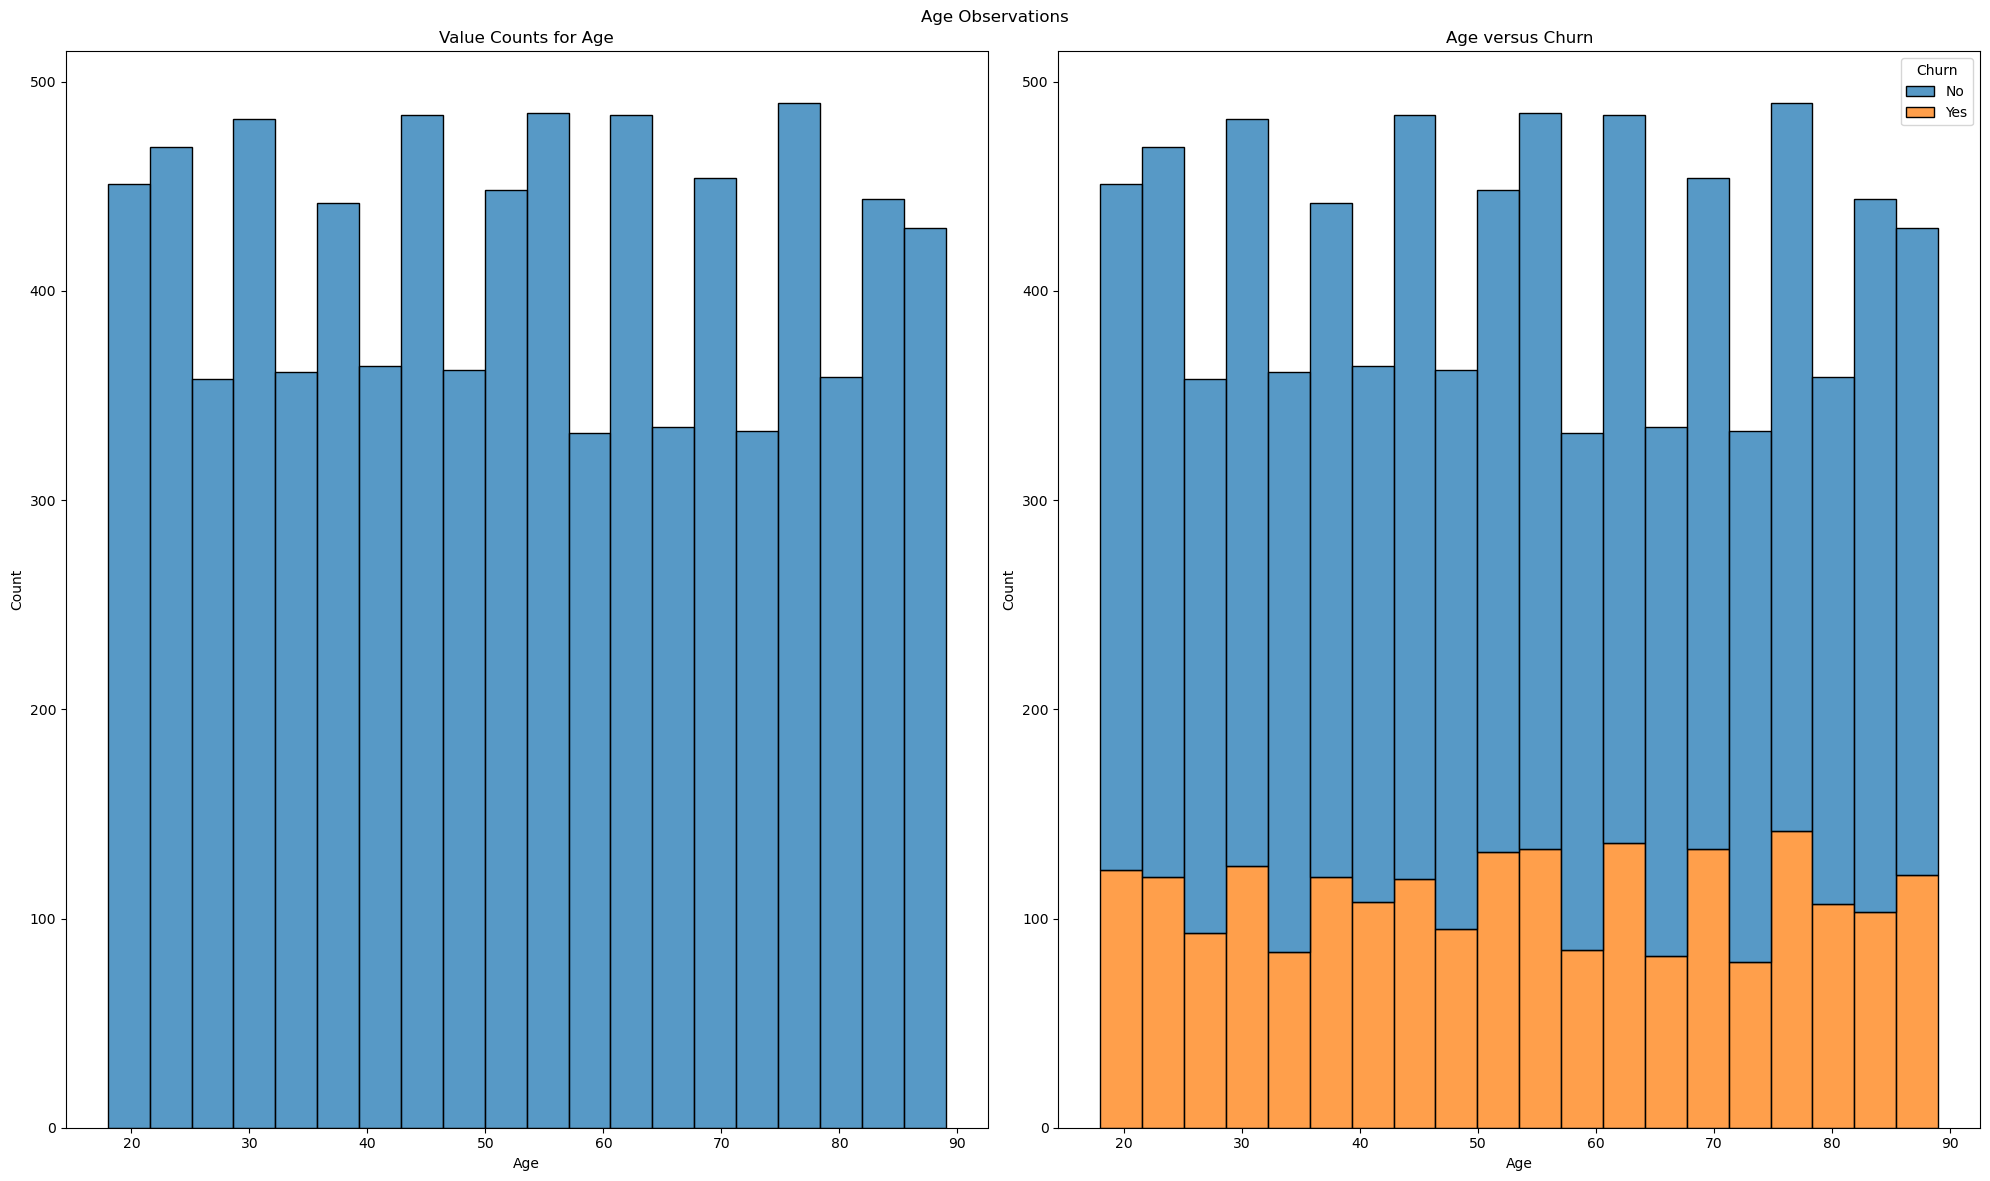

In [49]:
plt.figure(figsize = [20,12])
plt.suptitle("Age Observations")

# First subplot: histogram
plt.subplot(1,2,1)
plt.suptitle("Age Observations")
sns.histplot(data=df_logistic, x = 'Age', bins = 20)
plt.title('Value Counts for Age')
plt.xlabel('Age')
plt.ylabel('Count')


# Second subplot: histogram
plt.subplot(1, 2, 2)
plt.title("Age versus Churn")
sns.histplot(data=df_logistic, x='Age', hue='Churn', bins = 20, multiple = 'stack')
plt.xlabel("Age")
plt.ylabel("Count")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

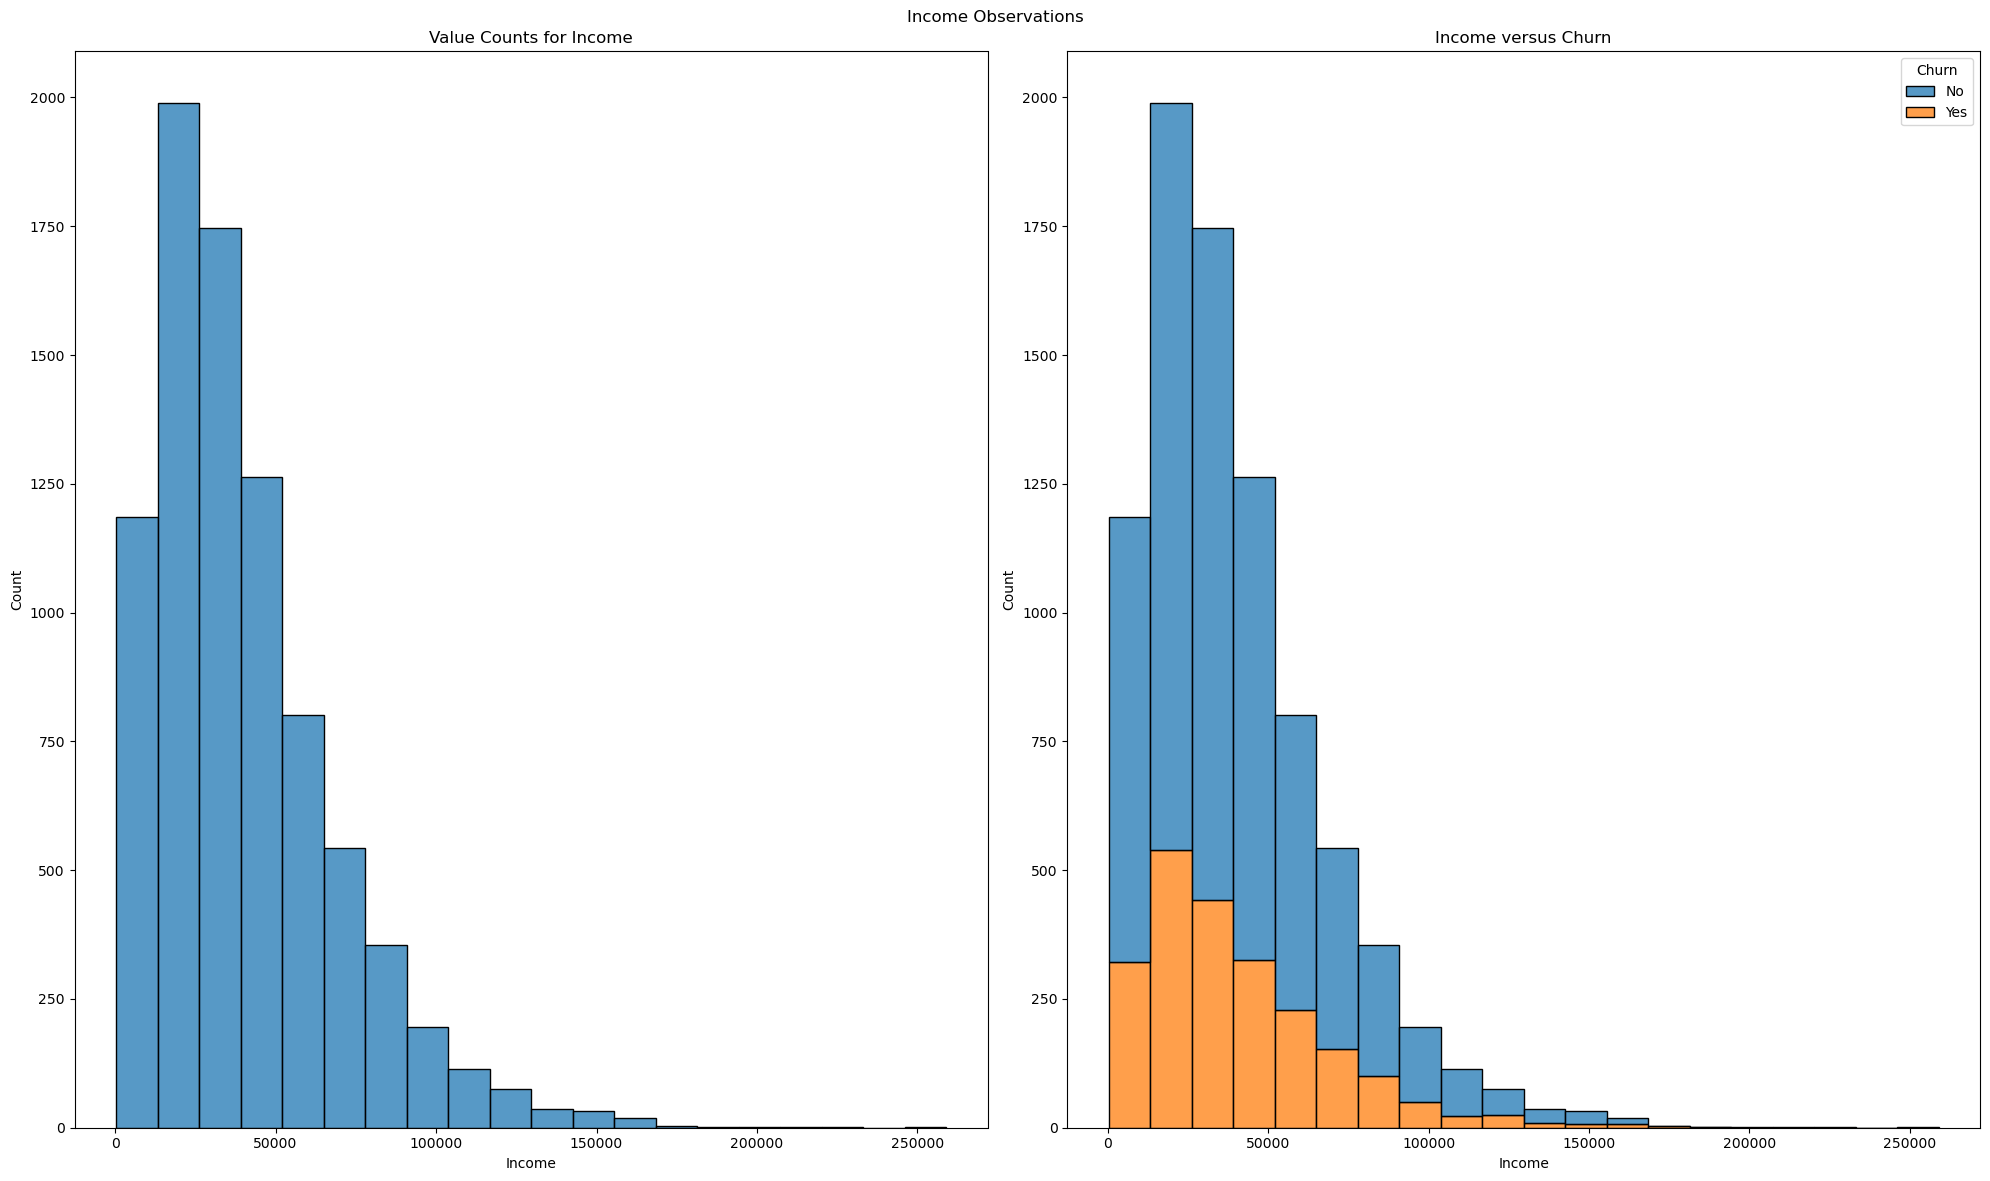

In [50]:
plt.figure(figsize = [20,12])
plt.suptitle("Income Observations")

# First subplot: histogram
plt.subplot(1,2,1)
plt.title("Income Observations")
sns.histplot(data=df_logistic, x = 'Income', bins = 20)
plt.title('Value Counts for Income')
plt.xlabel('Income')
plt.ylabel('Count')


# Second subplot: histogram
plt.subplot(1, 2, 2)
plt.title("Income versus Churn")
sns.histplot(data=df_logistic, x='Income', hue='Churn', bins = 20, multiple = 'stack')
plt.xlabel("Income")
plt.ylabel("Count")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

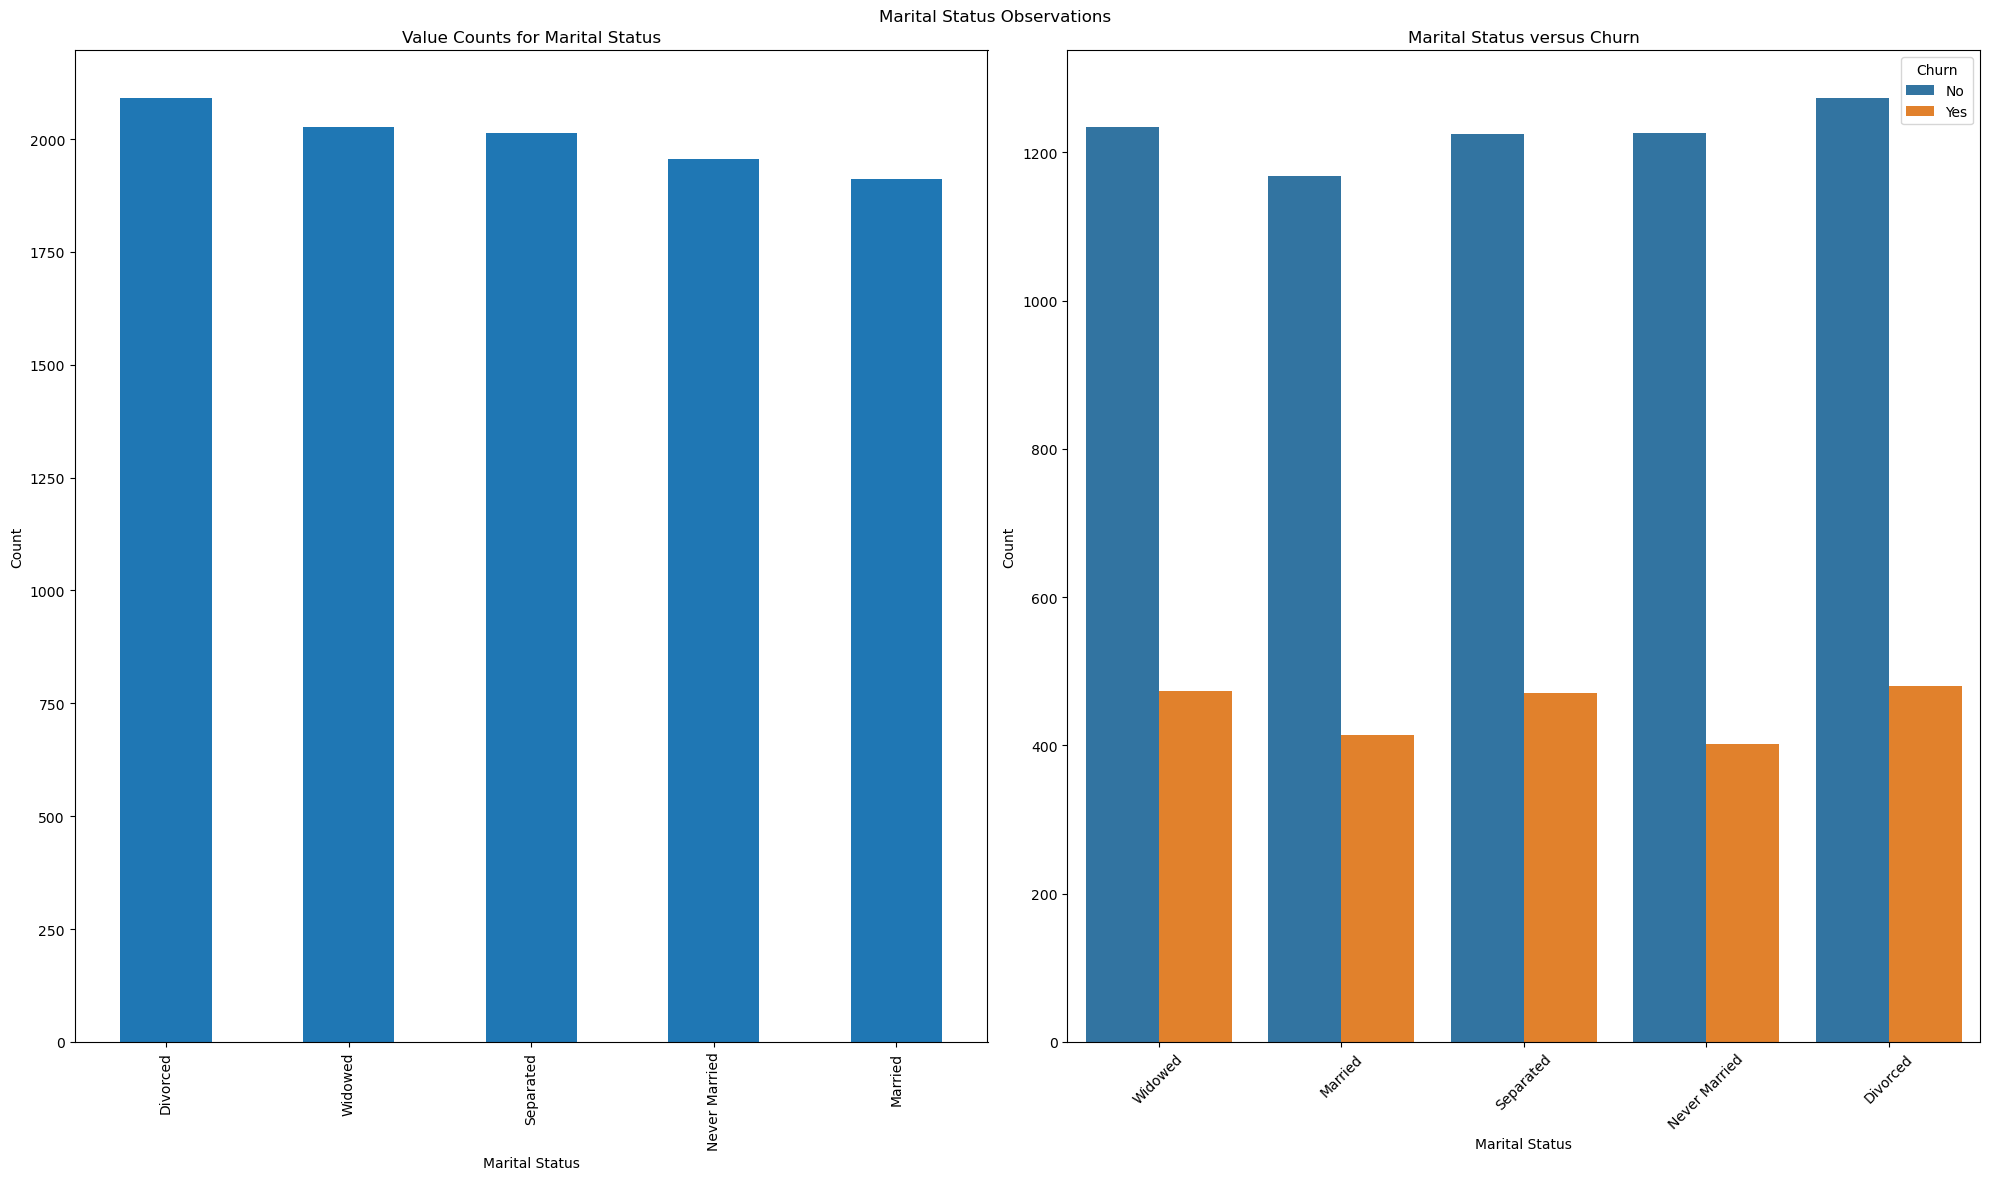

In [51]:
plt.figure(figsize = [20,12])
plt.suptitle("Marital Status Observations")

# First subplot: Count plot
plt.subplot(1,2,1)
marry_counts.plot(kind='bar')
plt.title('Value Counts for Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# Second subplot: Count plot
plt.subplot(1, 2, 2)
plt.title("Marital Status versus Churn")
sns.countplot(data=df_logistic, x='Marital', hue='Churn')
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

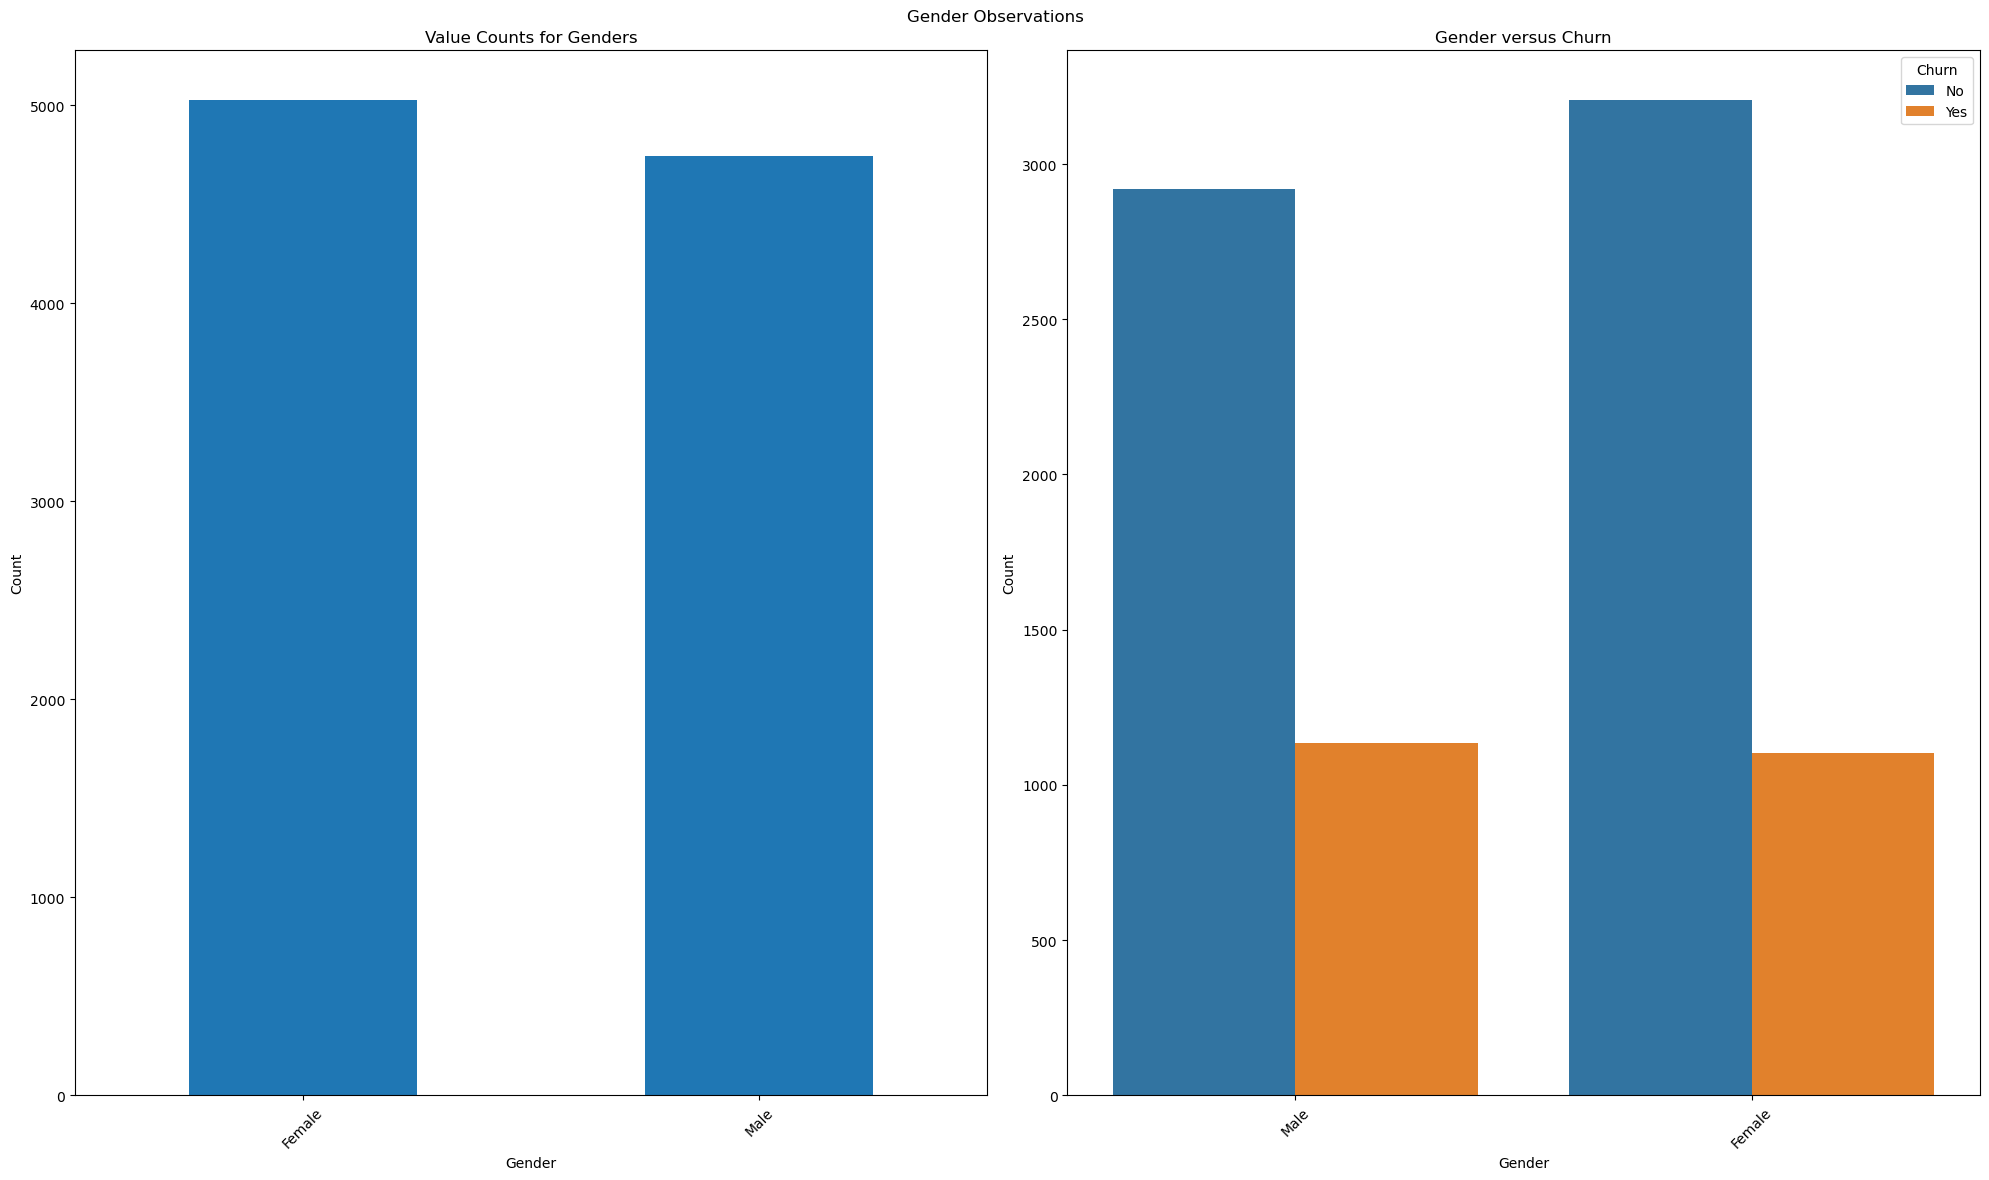

In [52]:
plt.figure(figsize = [20,12])
plt.suptitle("Gender Observations")

# First subplot: Count plot
plt.subplot(1,2,1)
gender_count.plot(kind='bar')
plt.title('Value Counts for Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)


# Second subplot: Count plot
plt.subplot(1, 2, 2)
plt.title("Gender versus Churn")
sns.countplot(data=df_logistic, x='Gender', hue='Churn')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

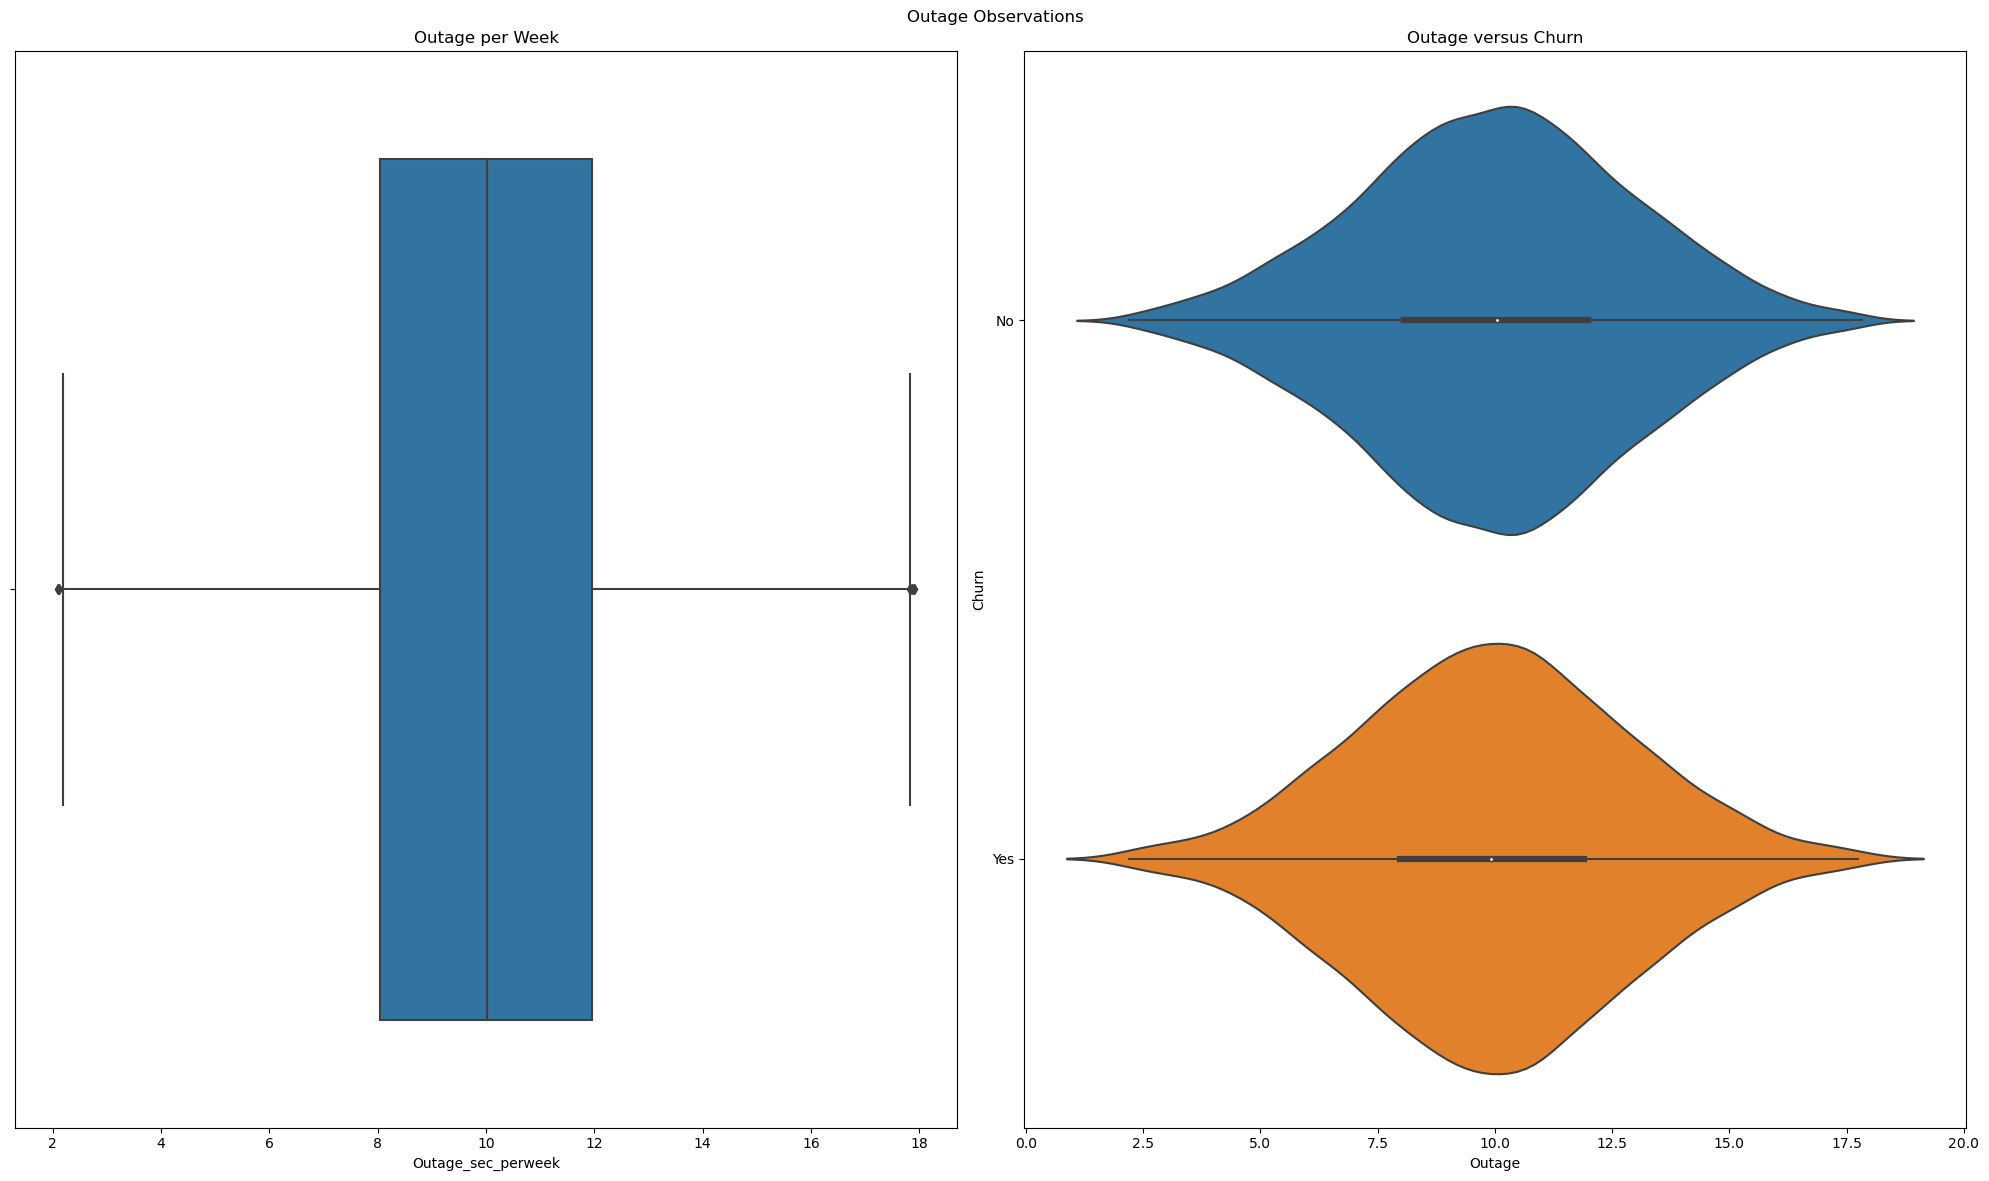

In [53]:
plt.figure(figsize = [20,12])
plt.suptitle("Outage Observations")

# First subplot: Count plot

plt.subplot(1,2,1)
sns.boxplot(x = 'Outage_sec_perweek', data = df_logistic)
plt.title('Outage per Week')


# Second subplot: Count plot
plt.subplot(1, 2, 2)
plt.title("Outage versus Churn")
sns.violinplot(data=df_logistic, x='Outage_sec_perweek', y ='Churn')
plt.xlabel("Outage")
plt.ylabel("Churn")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

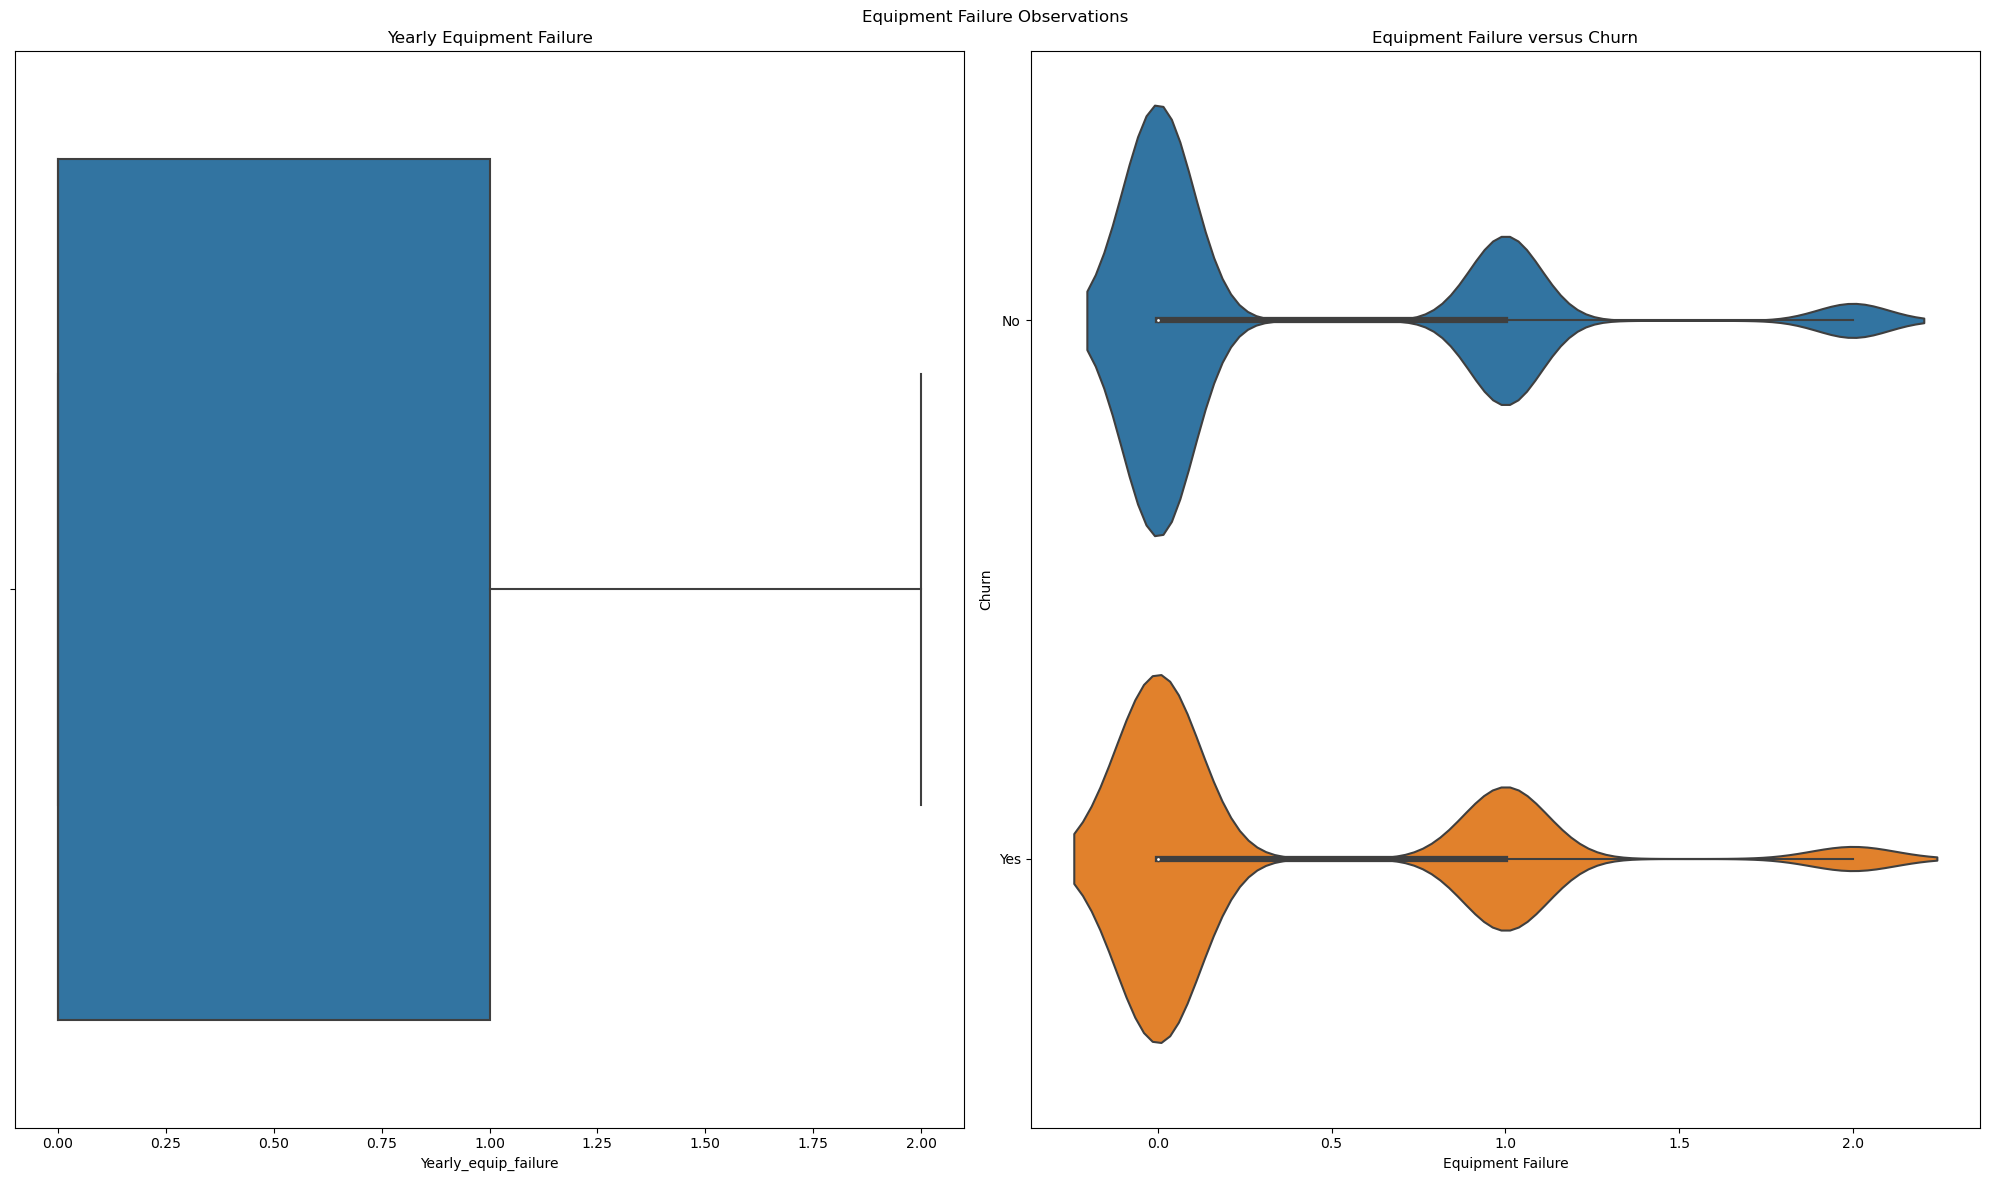

In [54]:
plt.figure(figsize = [20,12])
plt.suptitle("Equipment Failure Observations")

# First subplot: Box plot
plt.subplot(1,2,1)
sns.boxplot(x = 'Yearly_equip_failure', data = df_logistic)
plt.title('Yearly Equipment Failure')


# Second subplot: Count plot
plt.subplot(1, 2, 2)
plt.title("Equipment Failure versus Churn")
sns.violinplot(data=df_logistic, x='Yearly_equip_failure', y ='Churn')
plt.xlabel("Equipment Failure")
plt.ylabel("Churn")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

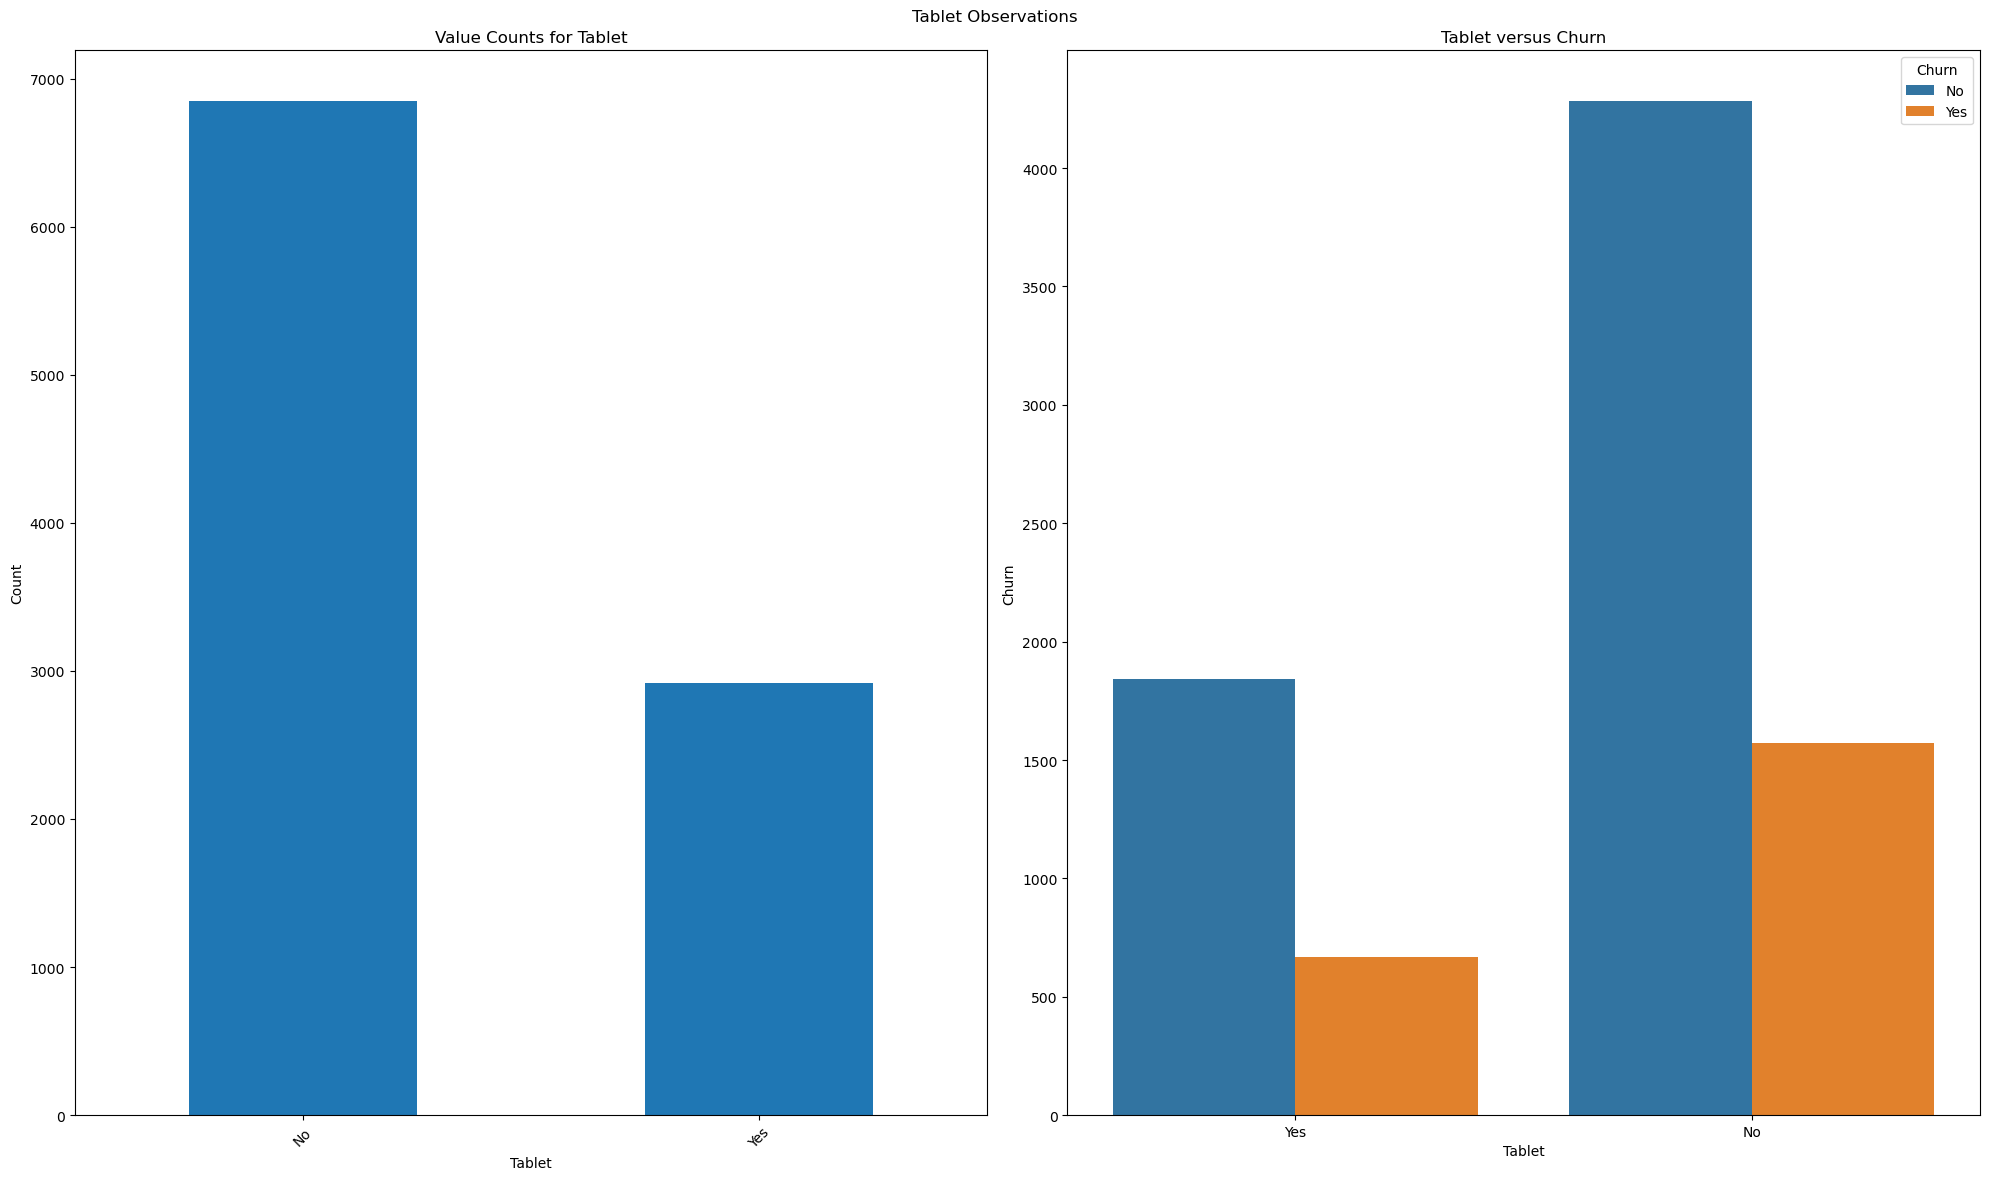

In [55]:
plt.figure(figsize = [20,12])
plt.suptitle("Tablet Observations")

# First subplot: Count plot
plt.subplot(1,2,1)
tablet_counts.plot(kind='bar')
plt.title('Value Counts for Tablet')
plt.xlabel('Tablet')
plt.ylabel('Count')
plt.xticks(rotation=45)


# Second subplot: Count plot
plt.subplot(1, 2, 2)
plt.title("Tablet versus Churn")
sns.countplot(data=df_logistic, x='Tablet', hue ='Churn')
plt.xlabel("Tablet")
plt.ylabel("Churn")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

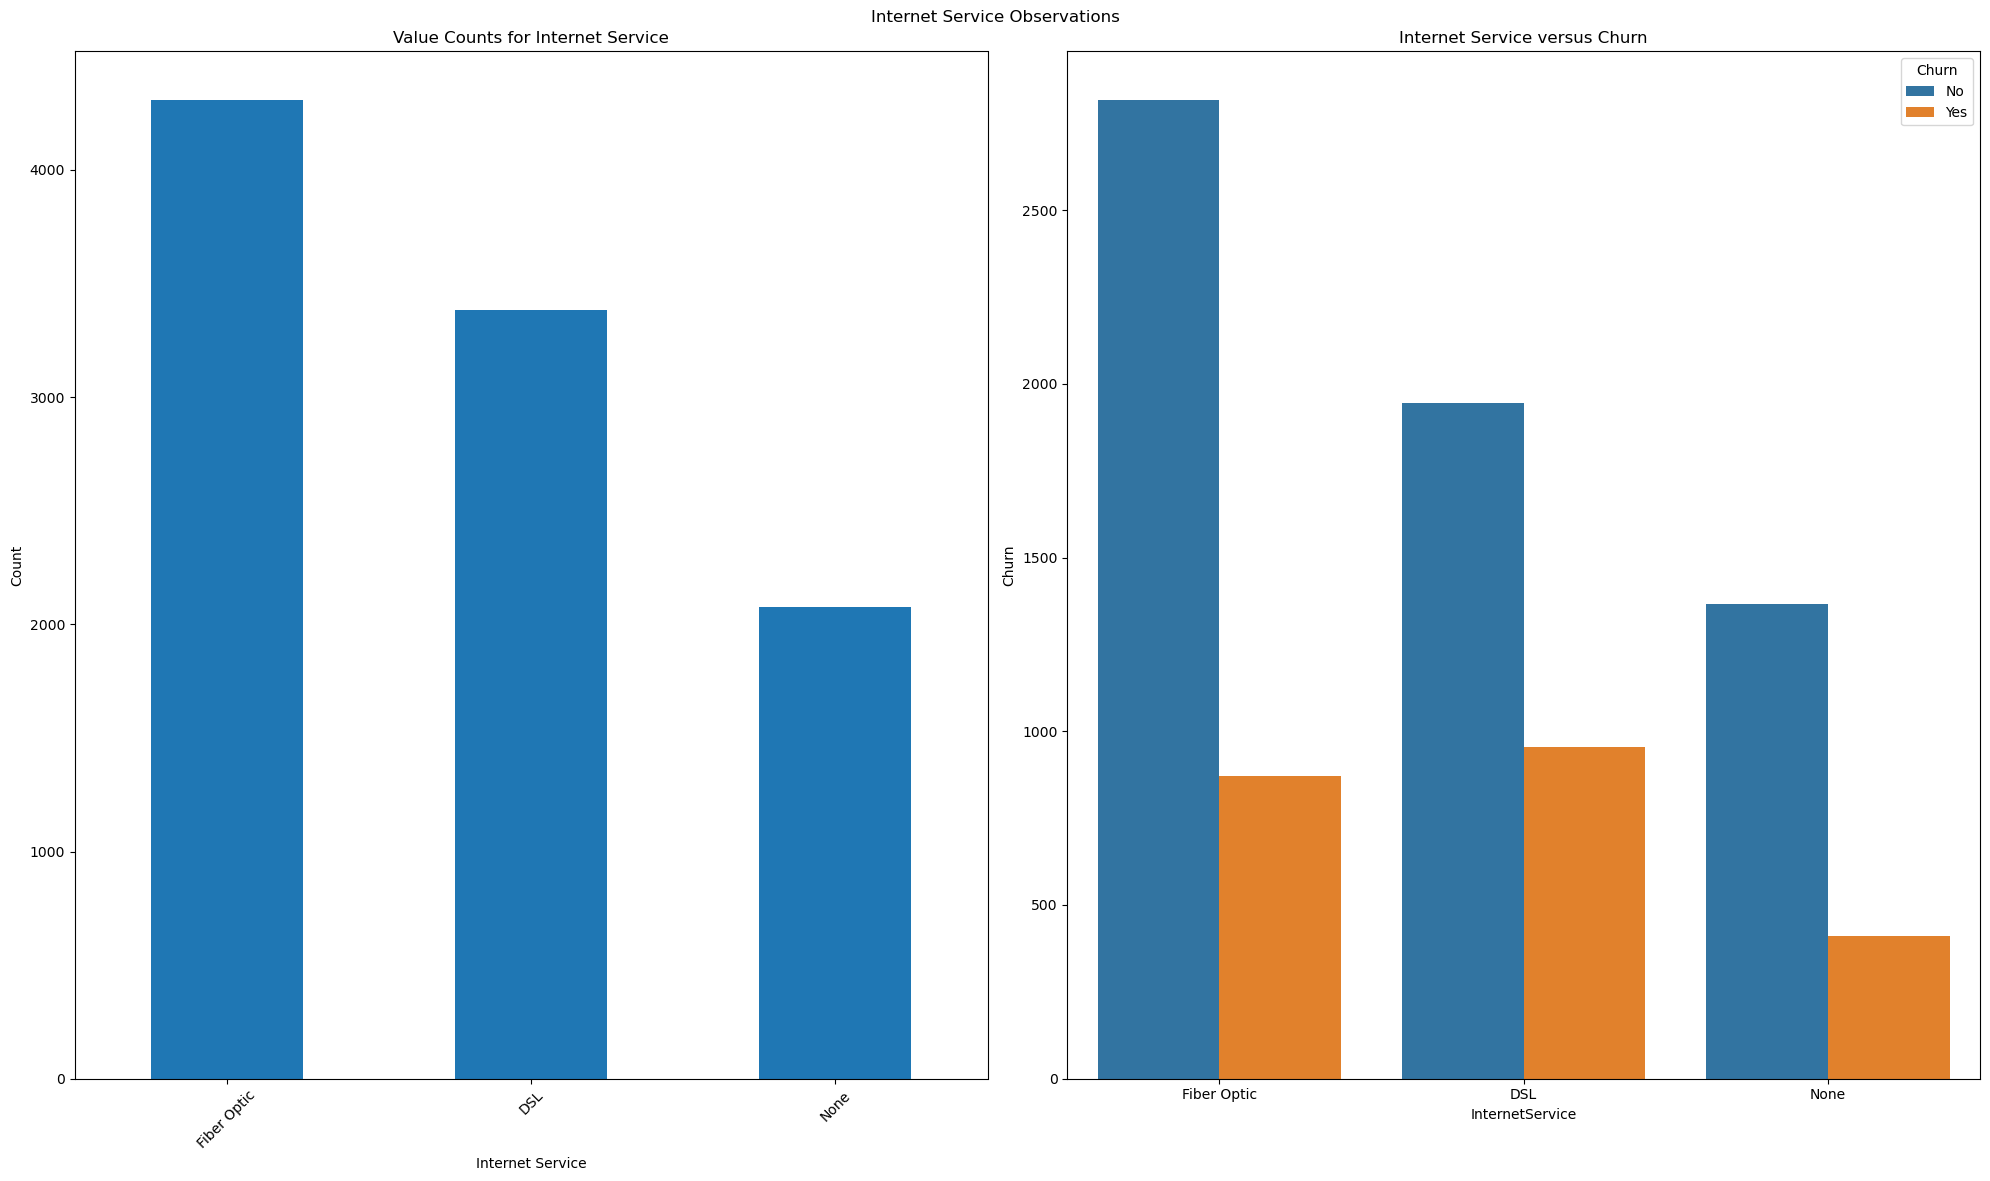

In [56]:
plt.figure(figsize = [20,12])
plt.suptitle("Internet Service Observations")

# First subplot: Count plot
plt.subplot(1,2,1)
is_counts.plot(kind='bar')
plt.title('Value Counts for Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=45)


# Second subplot: Count plot
plt.subplot(1, 2, 2)
plt.title("Internet Service versus Churn")
sns.countplot(data=df_logistic, x='InternetService', hue ='Churn')
plt.xlabel("InternetService")
plt.ylabel("Churn")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

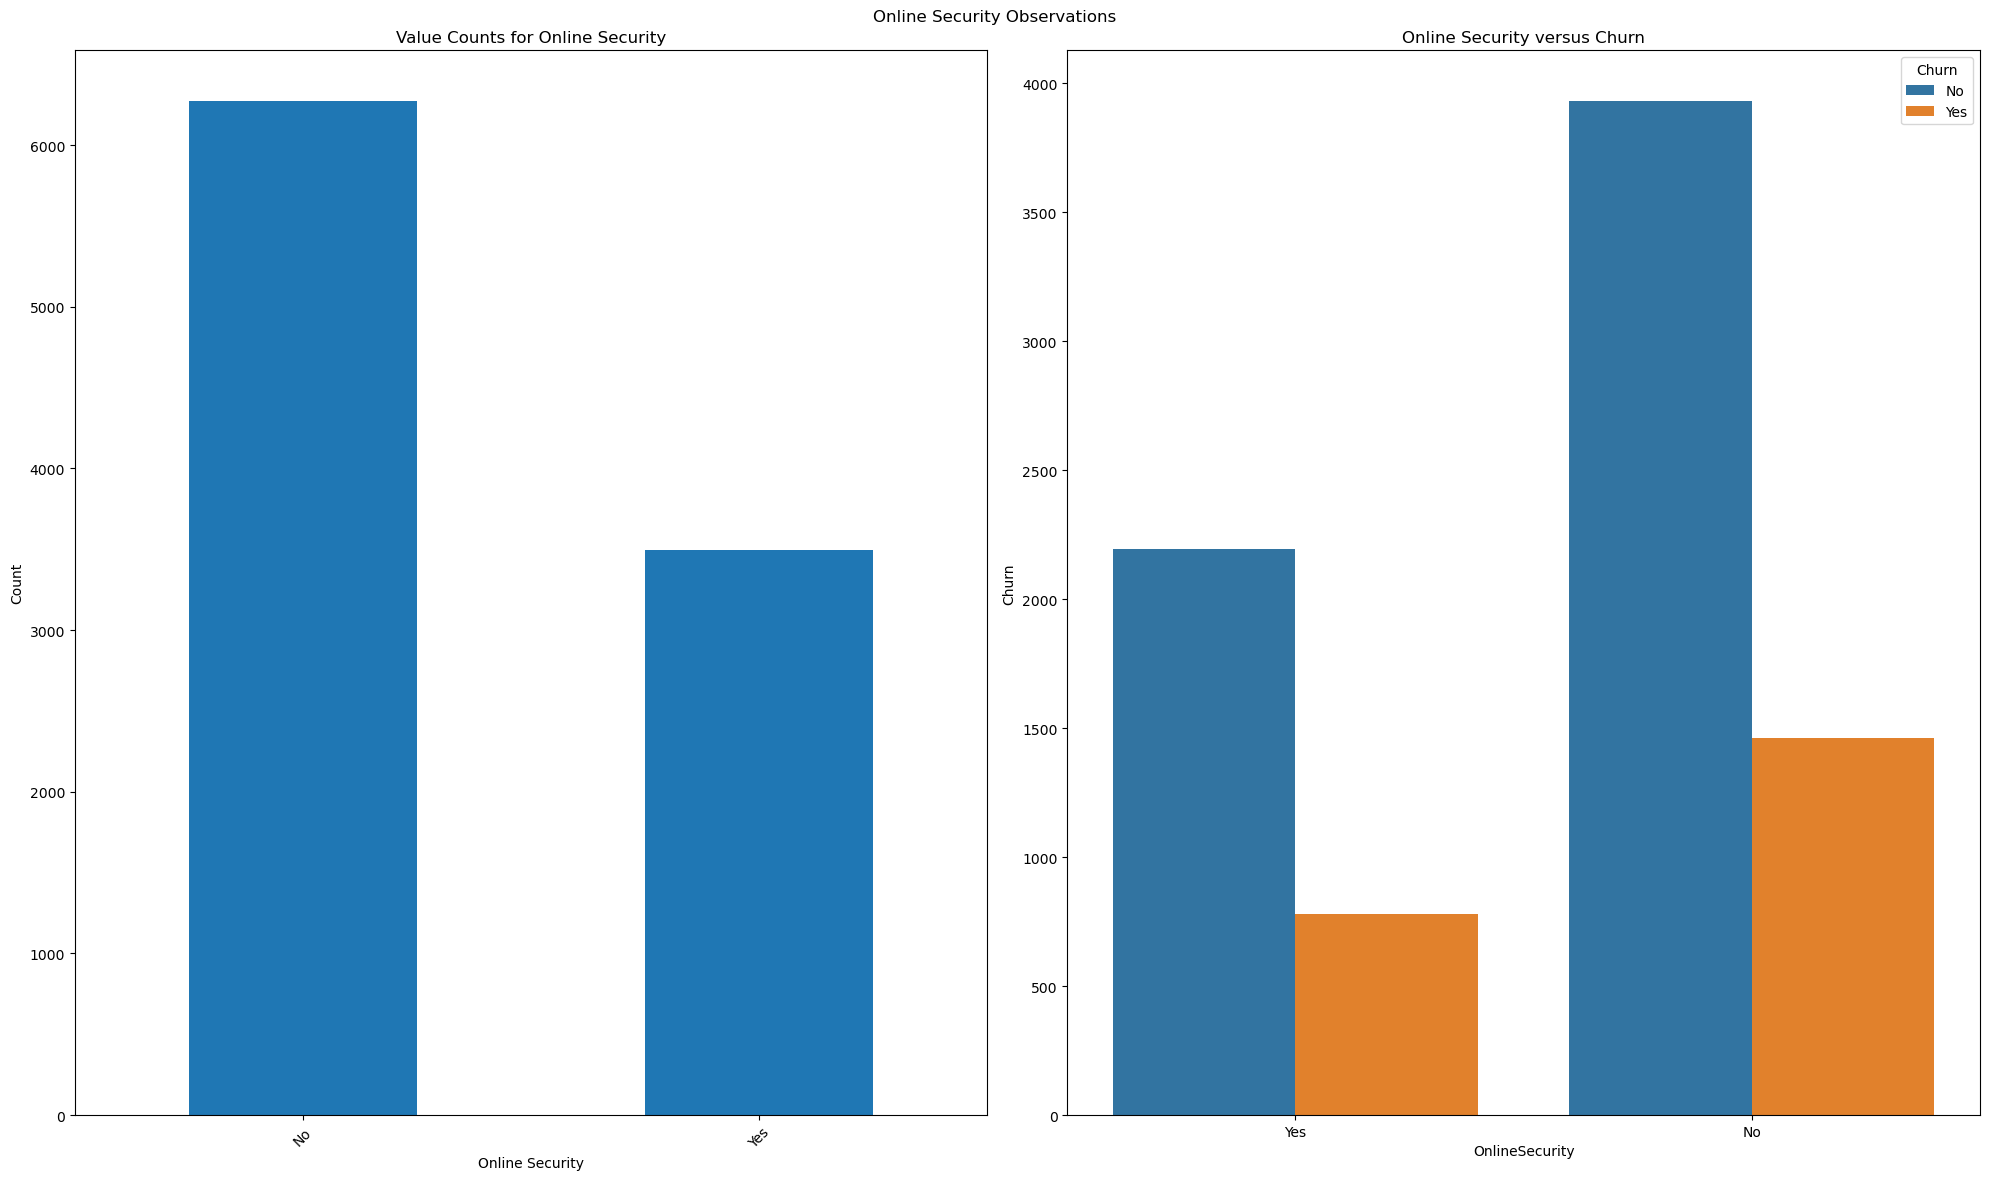

In [57]:
plt.figure(figsize = [20,12])
plt.suptitle("Online Security Observations")

# First subplot: Count plot
plt.subplot(1,2,1)
os_counts.plot(kind='bar')
plt.title('Value Counts for Online Security')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Second subplot: Count plot
plt.subplot(1, 2, 2)
plt.title("Online Security versus Churn")
sns.countplot(data=df_logistic, x='OnlineSecurity', hue ='Churn')
plt.xlabel("OnlineSecurity")
plt.ylabel("Churn")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

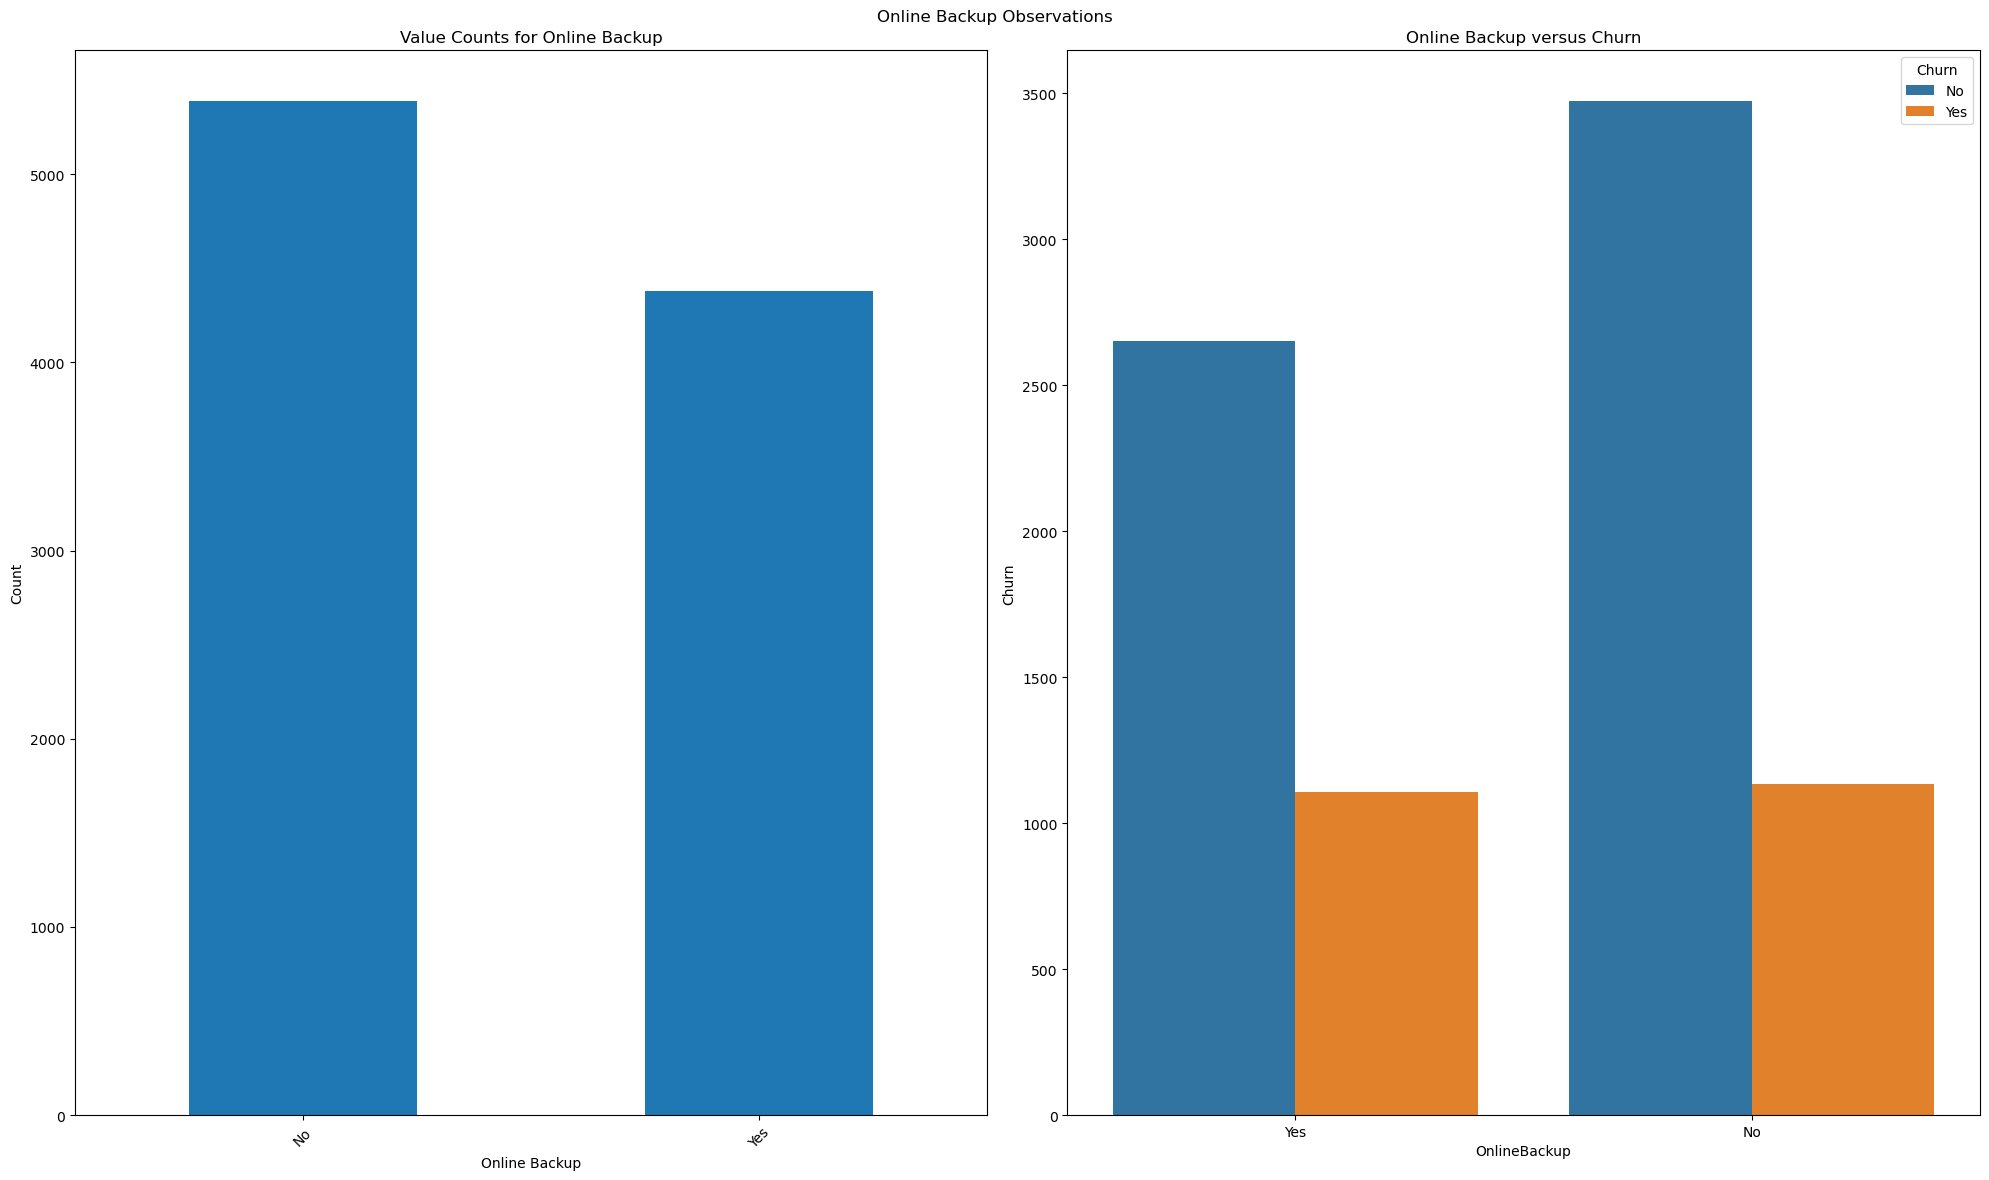

In [58]:
plt.figure(figsize = [20,12])
plt.suptitle("Online Backup Observations")

# First subplot: Count plot
plt.subplot(1,2,1)
ob_counts.plot(kind='bar')
plt.title('Value Counts for Online Backup')
plt.xlabel('Online Backup')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Second subplot: Count plot
plt.subplot(1, 2, 2)
plt.title("Online Backup versus Churn")
sns.countplot(data=df_logistic, x='OnlineBackup', hue ='Churn')
plt.xlabel("OnlineBackup")
plt.ylabel("Churn")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

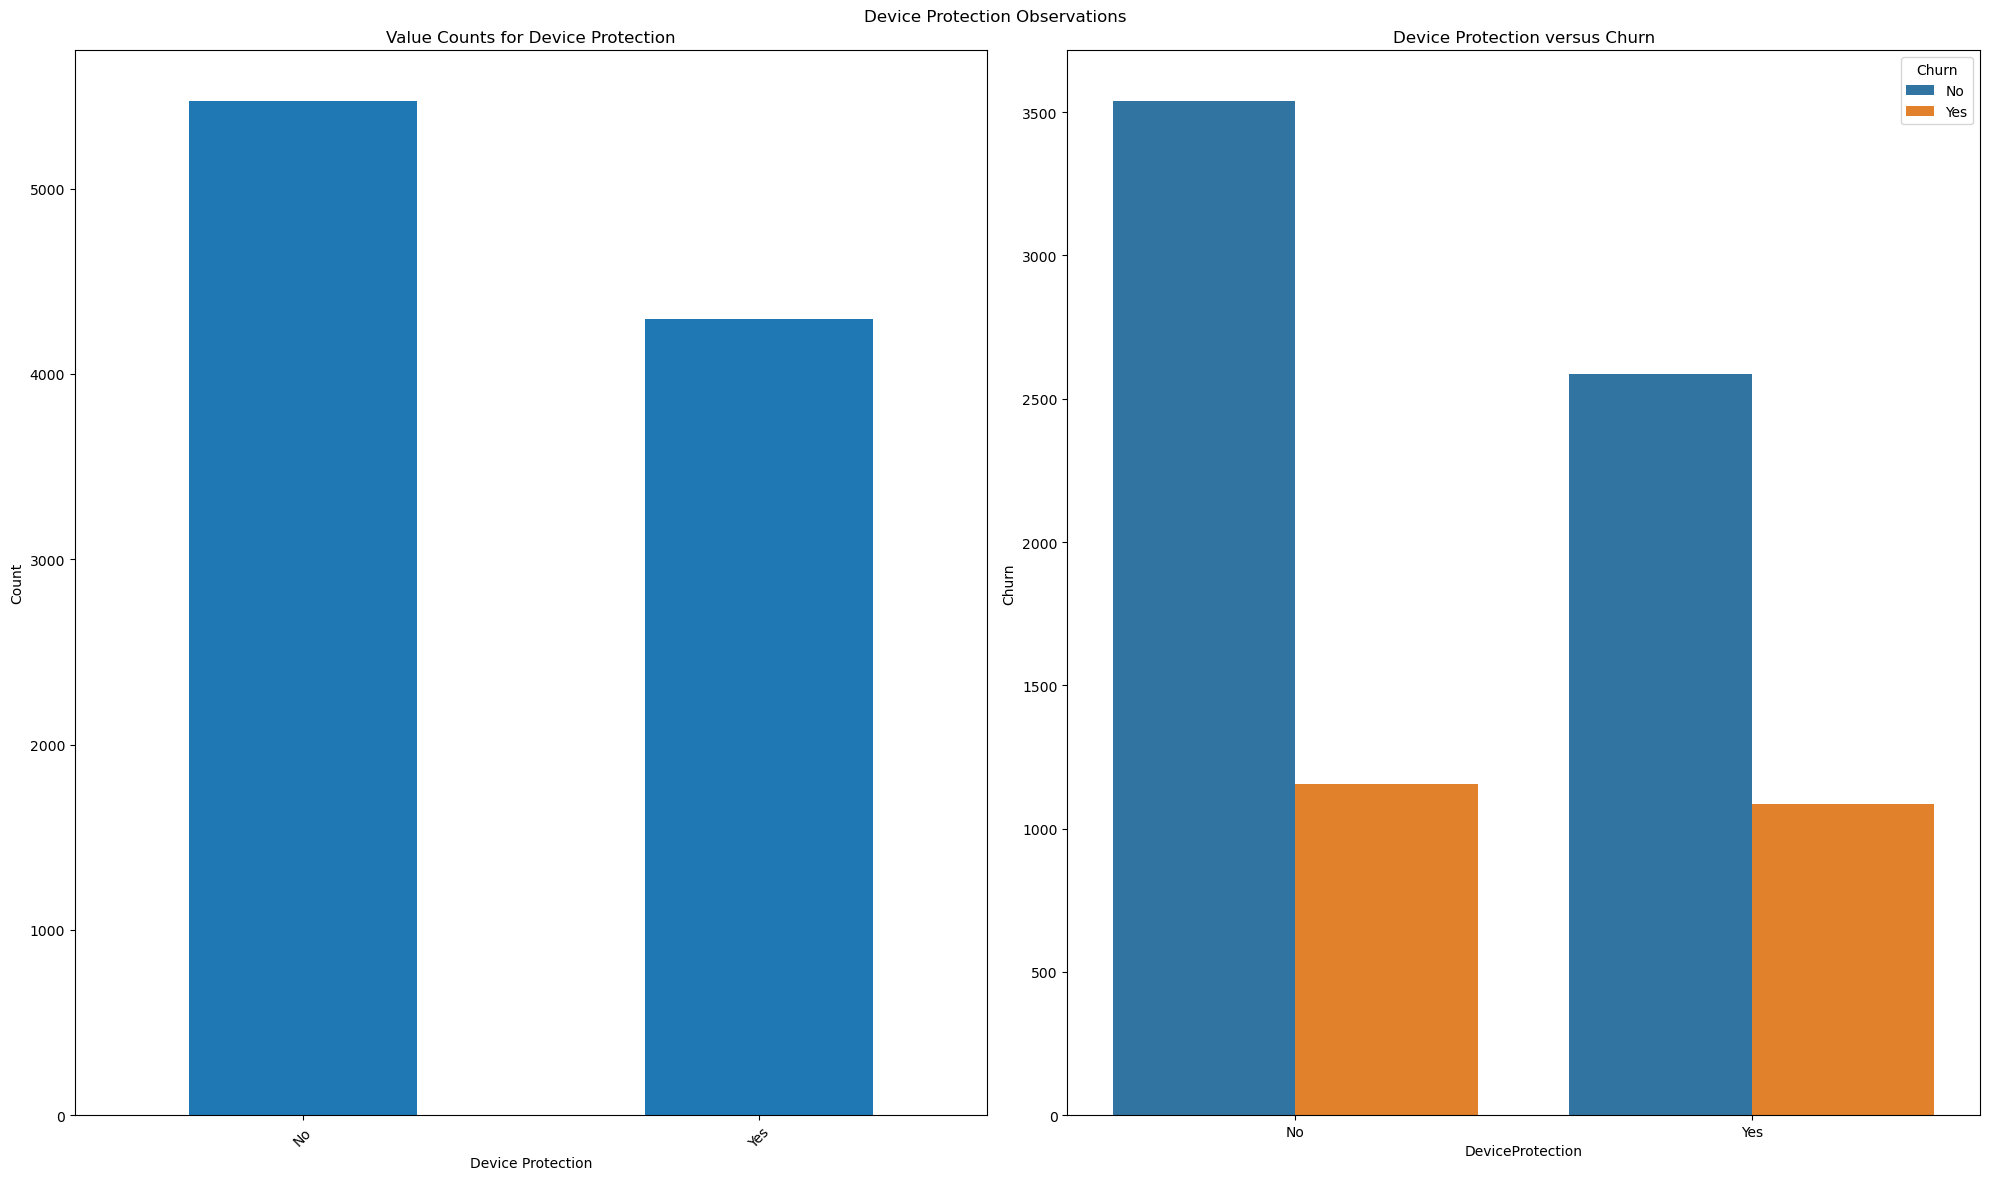

In [59]:
plt.figure(figsize = [20,12])
plt.suptitle("Device Protection Observations")

# First subplot: Count plot
plt.subplot(1,2,1)
dp_counts.plot(kind='bar')
plt.title('Value Counts for Device Protection')
plt.xlabel('Device Protection')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Second subplot: Count plot
plt.subplot(1, 2, 2)
plt.title("Device Protection versus Churn")
sns.countplot(data=df_logistic, x='DeviceProtection', hue ='Churn')
plt.xlabel("DeviceProtection")
plt.ylabel("Churn")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

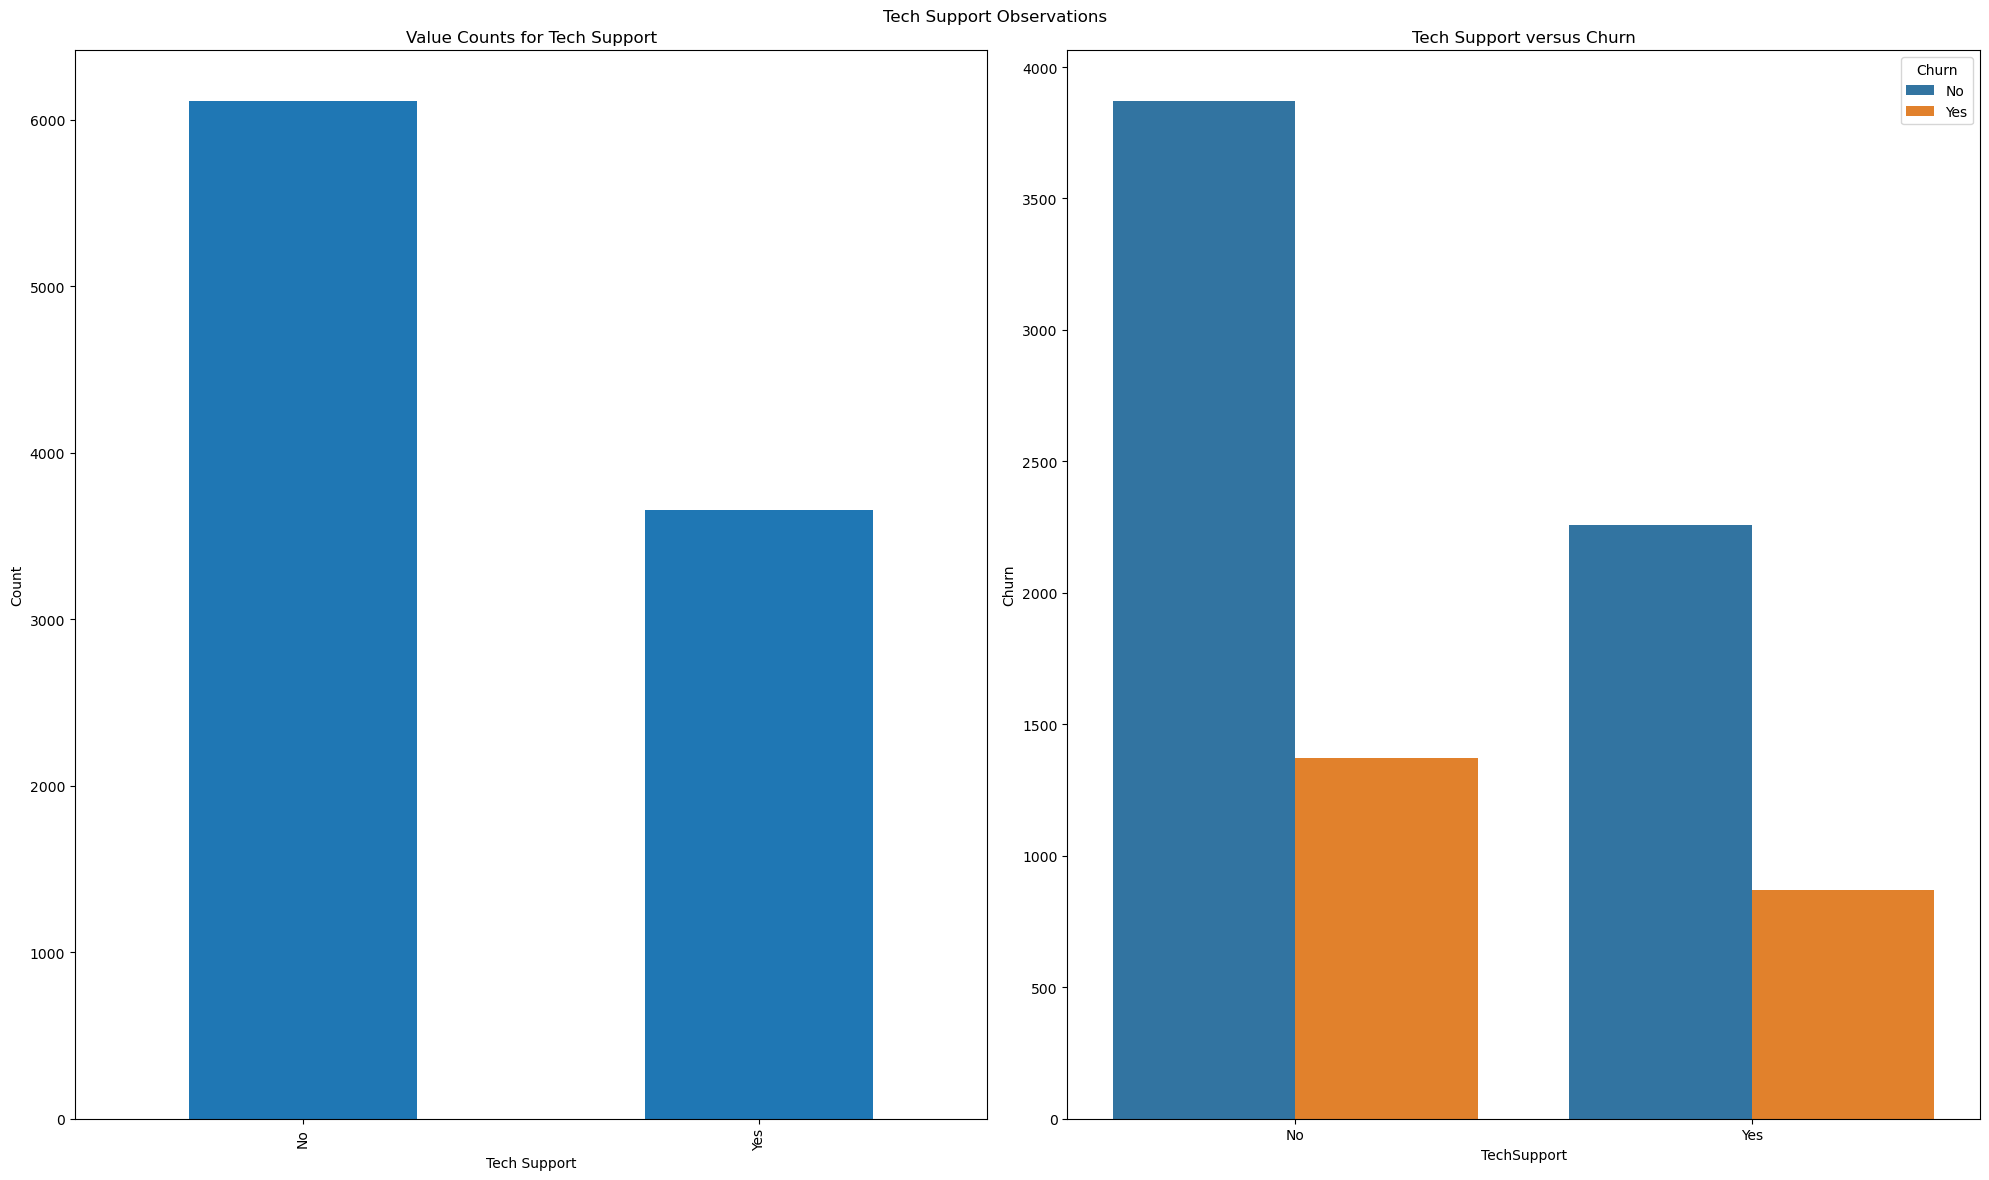

In [60]:
plt.figure(figsize = [20,12])
plt.suptitle("Tech Support Observations")

# First subplot: Count plot
plt.subplot(1,2,1)
ts_counts.plot(kind='bar')
plt.title('Value Counts for Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Count')


# Second subplot: Count plot
plt.subplot(1, 2, 2)
plt.title("Tech Support versus Churn")
sns.countplot(data=df_logistic, x='TechSupport', hue ='Churn')
plt.xlabel("TechSupport")
plt.ylabel("Churn")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

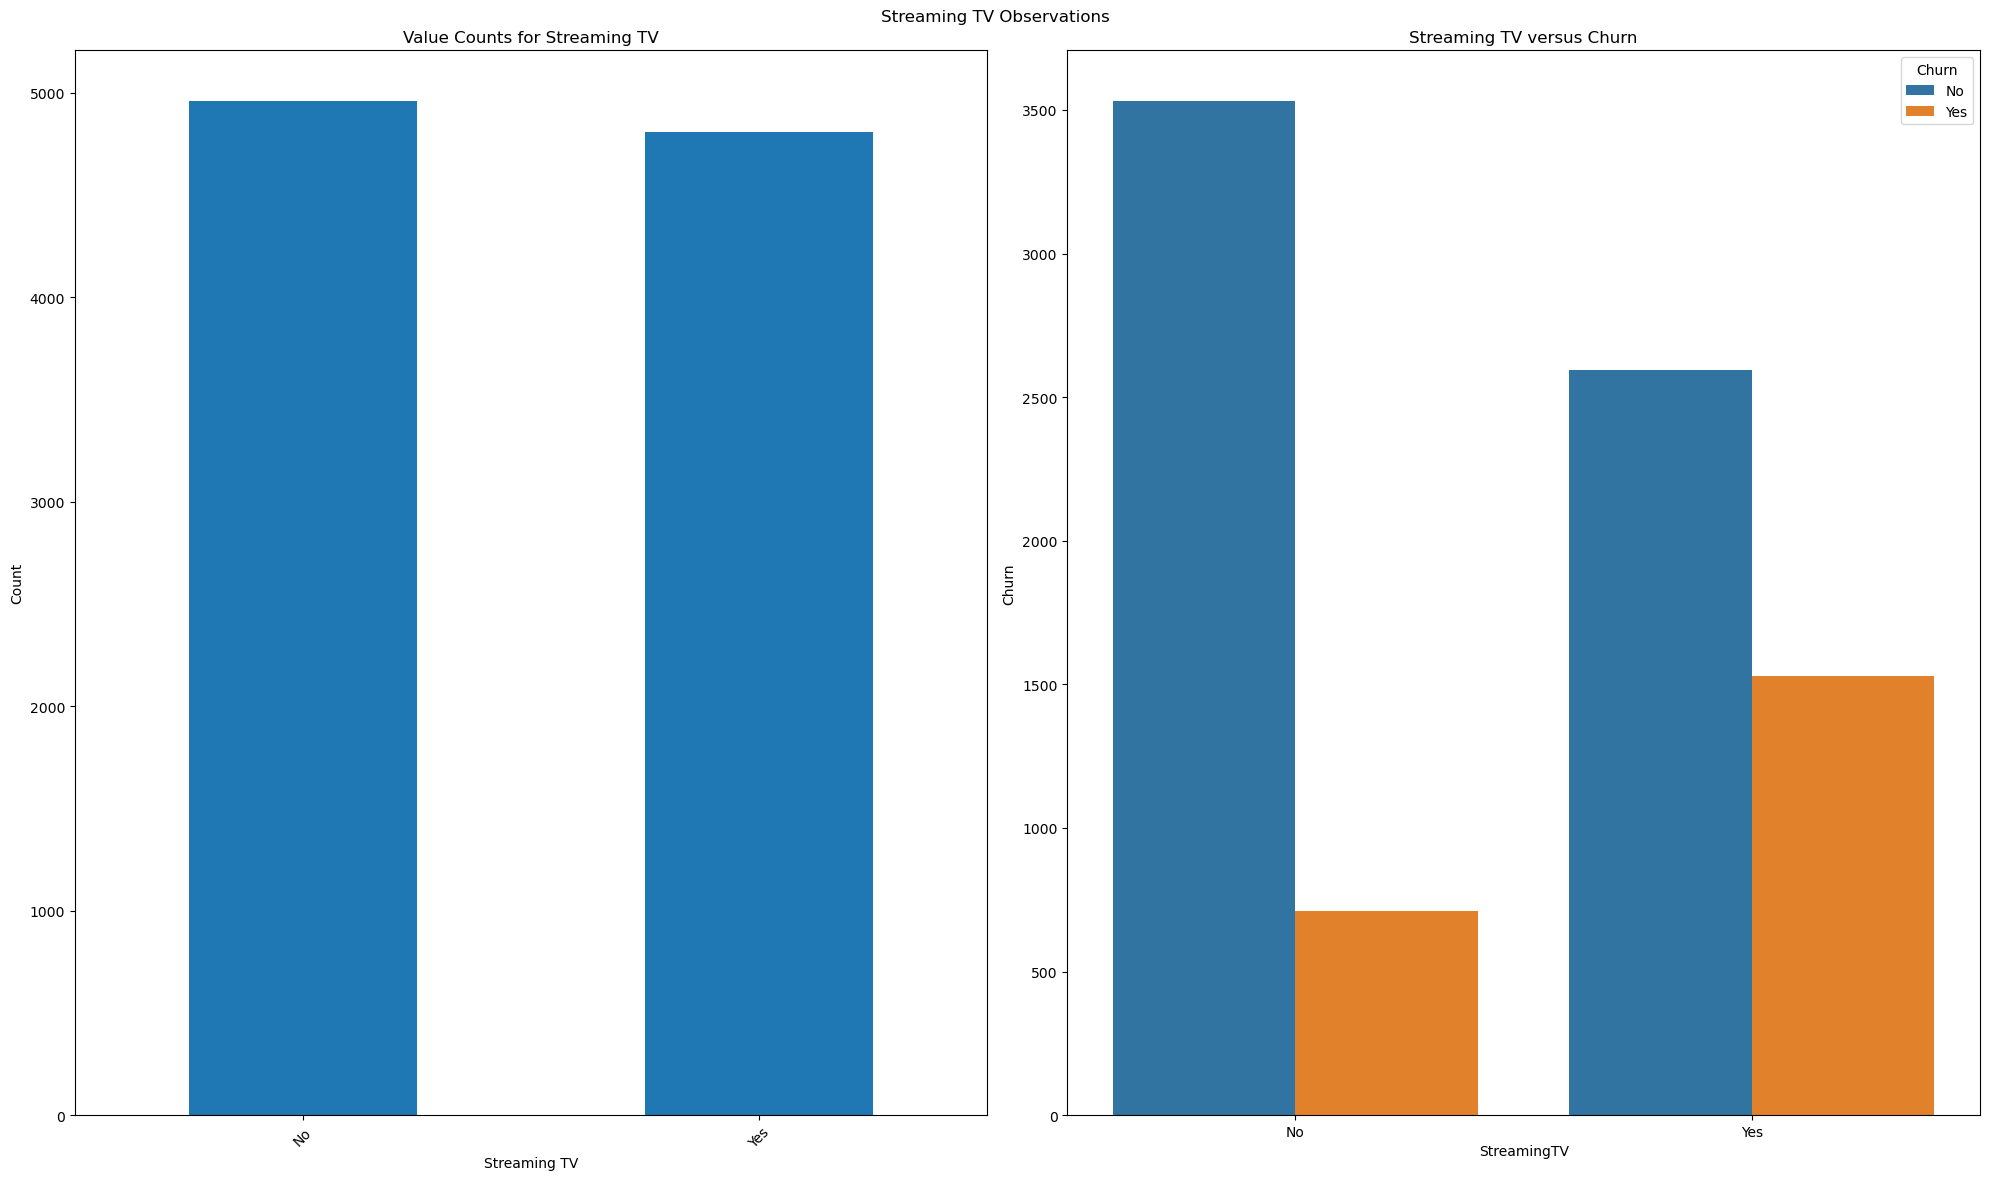

In [61]:
plt.figure(figsize = [20,12])
plt.suptitle("Streaming TV Observations")

# First subplot: Count plot
plt.subplot(1,2,1)
stv_counts.plot(kind='bar')
plt.title('Value Counts for Streaming TV')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Second subplot: Count plot
plt.subplot(1, 2, 2)
plt.title("Streaming TV versus Churn")
sns.countplot(data=df_logistic, x='StreamingTV', hue ='Churn')
plt.xlabel("StreamingTV")
plt.ylabel("Churn")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

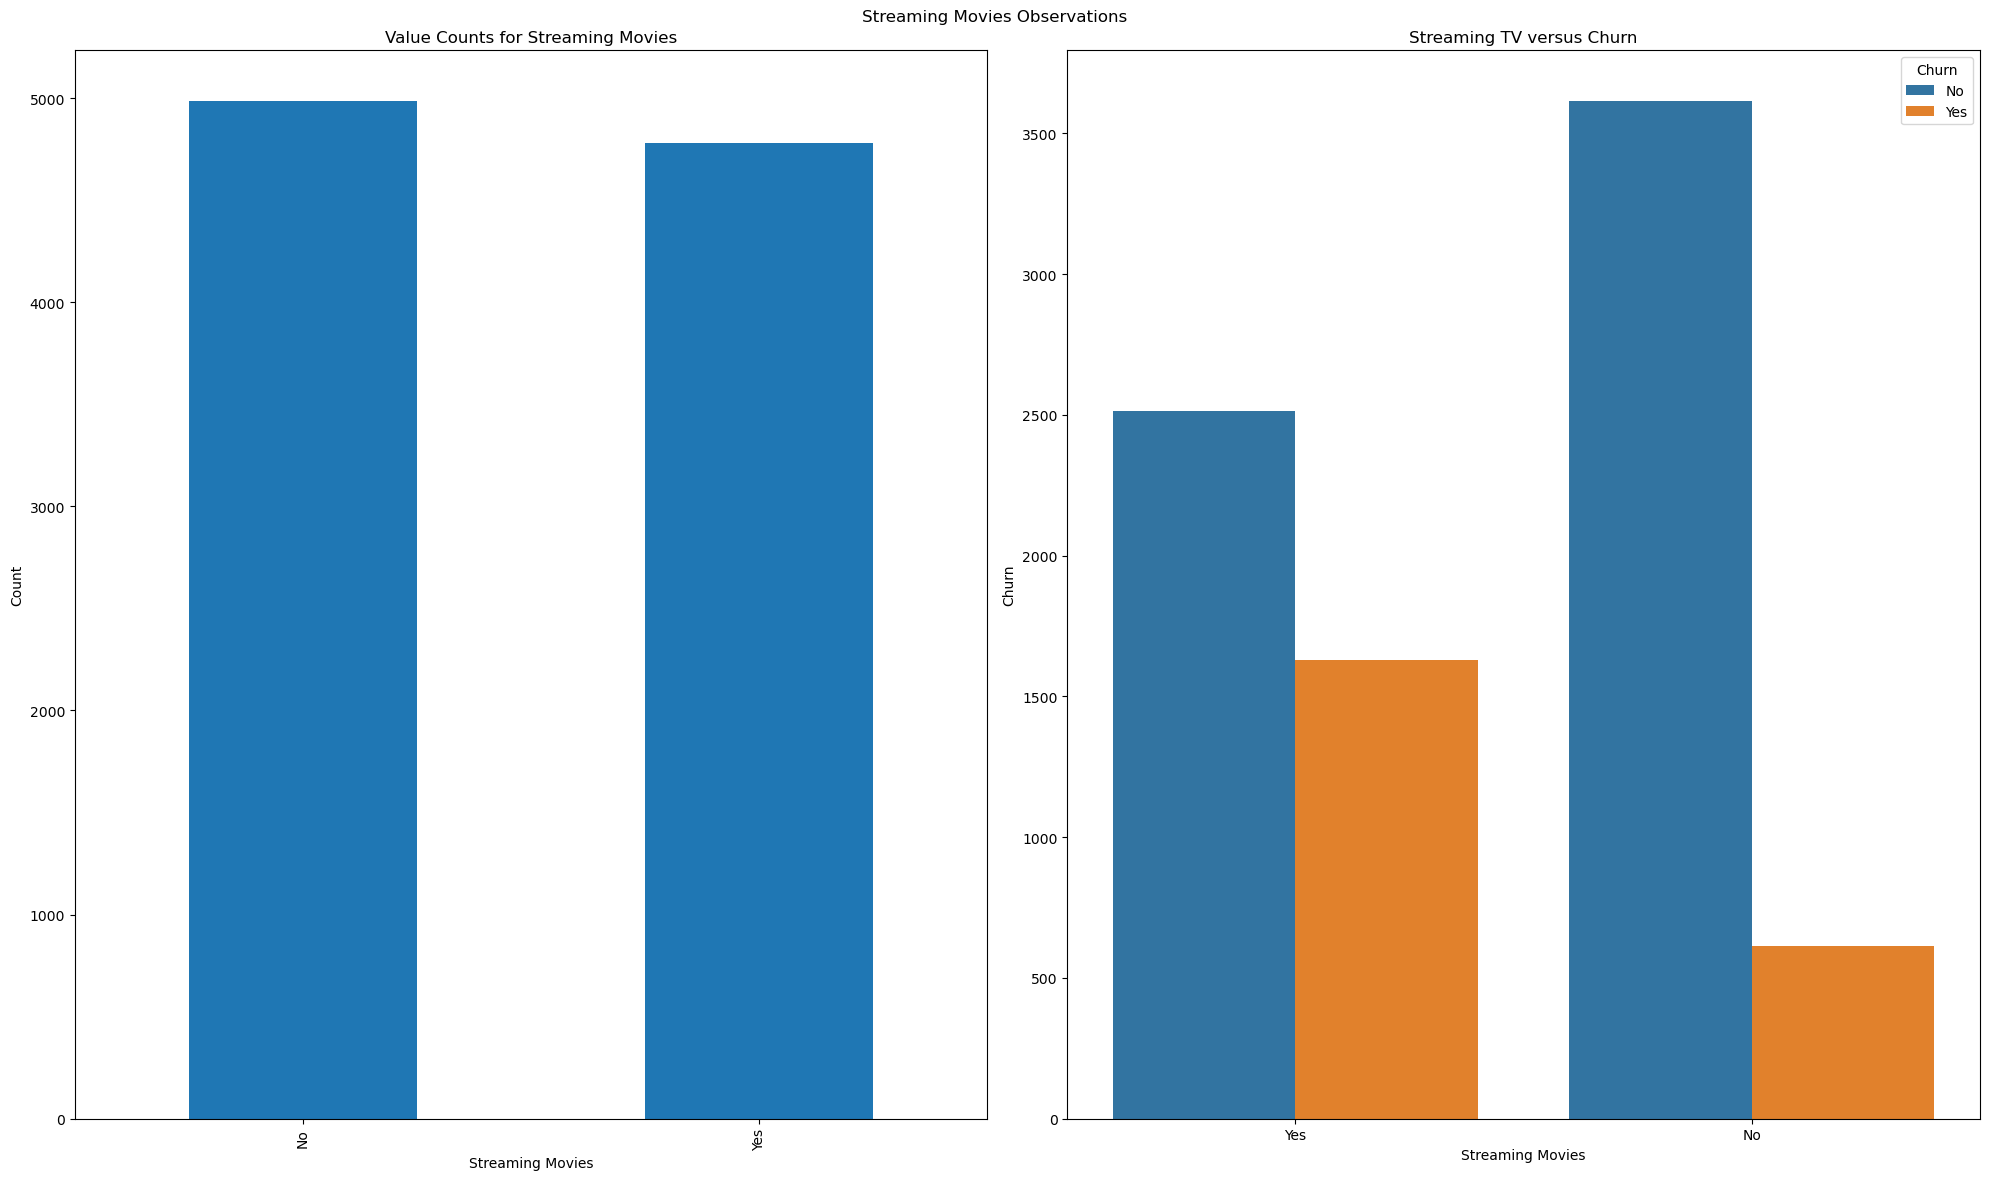

In [62]:
plt.figure(figsize = [20,12])
plt.suptitle("Streaming Movies Observations")

# First subplot: Count plot
plt.subplot(1,2,1)
sm_counts.plot(kind='bar')
plt.title('Value Counts for Streaming Movies')
plt.xlabel('Streaming Movies')
plt.ylabel('Count')


# Second subplot: Count plot
plt.subplot(1, 2, 2)
plt.title("Streaming TV versus Churn")
sns.countplot(data=df_logistic, x='StreamingMovies', hue ='Churn')
plt.xlabel("Streaming Movies")
plt.ylabel("Churn")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

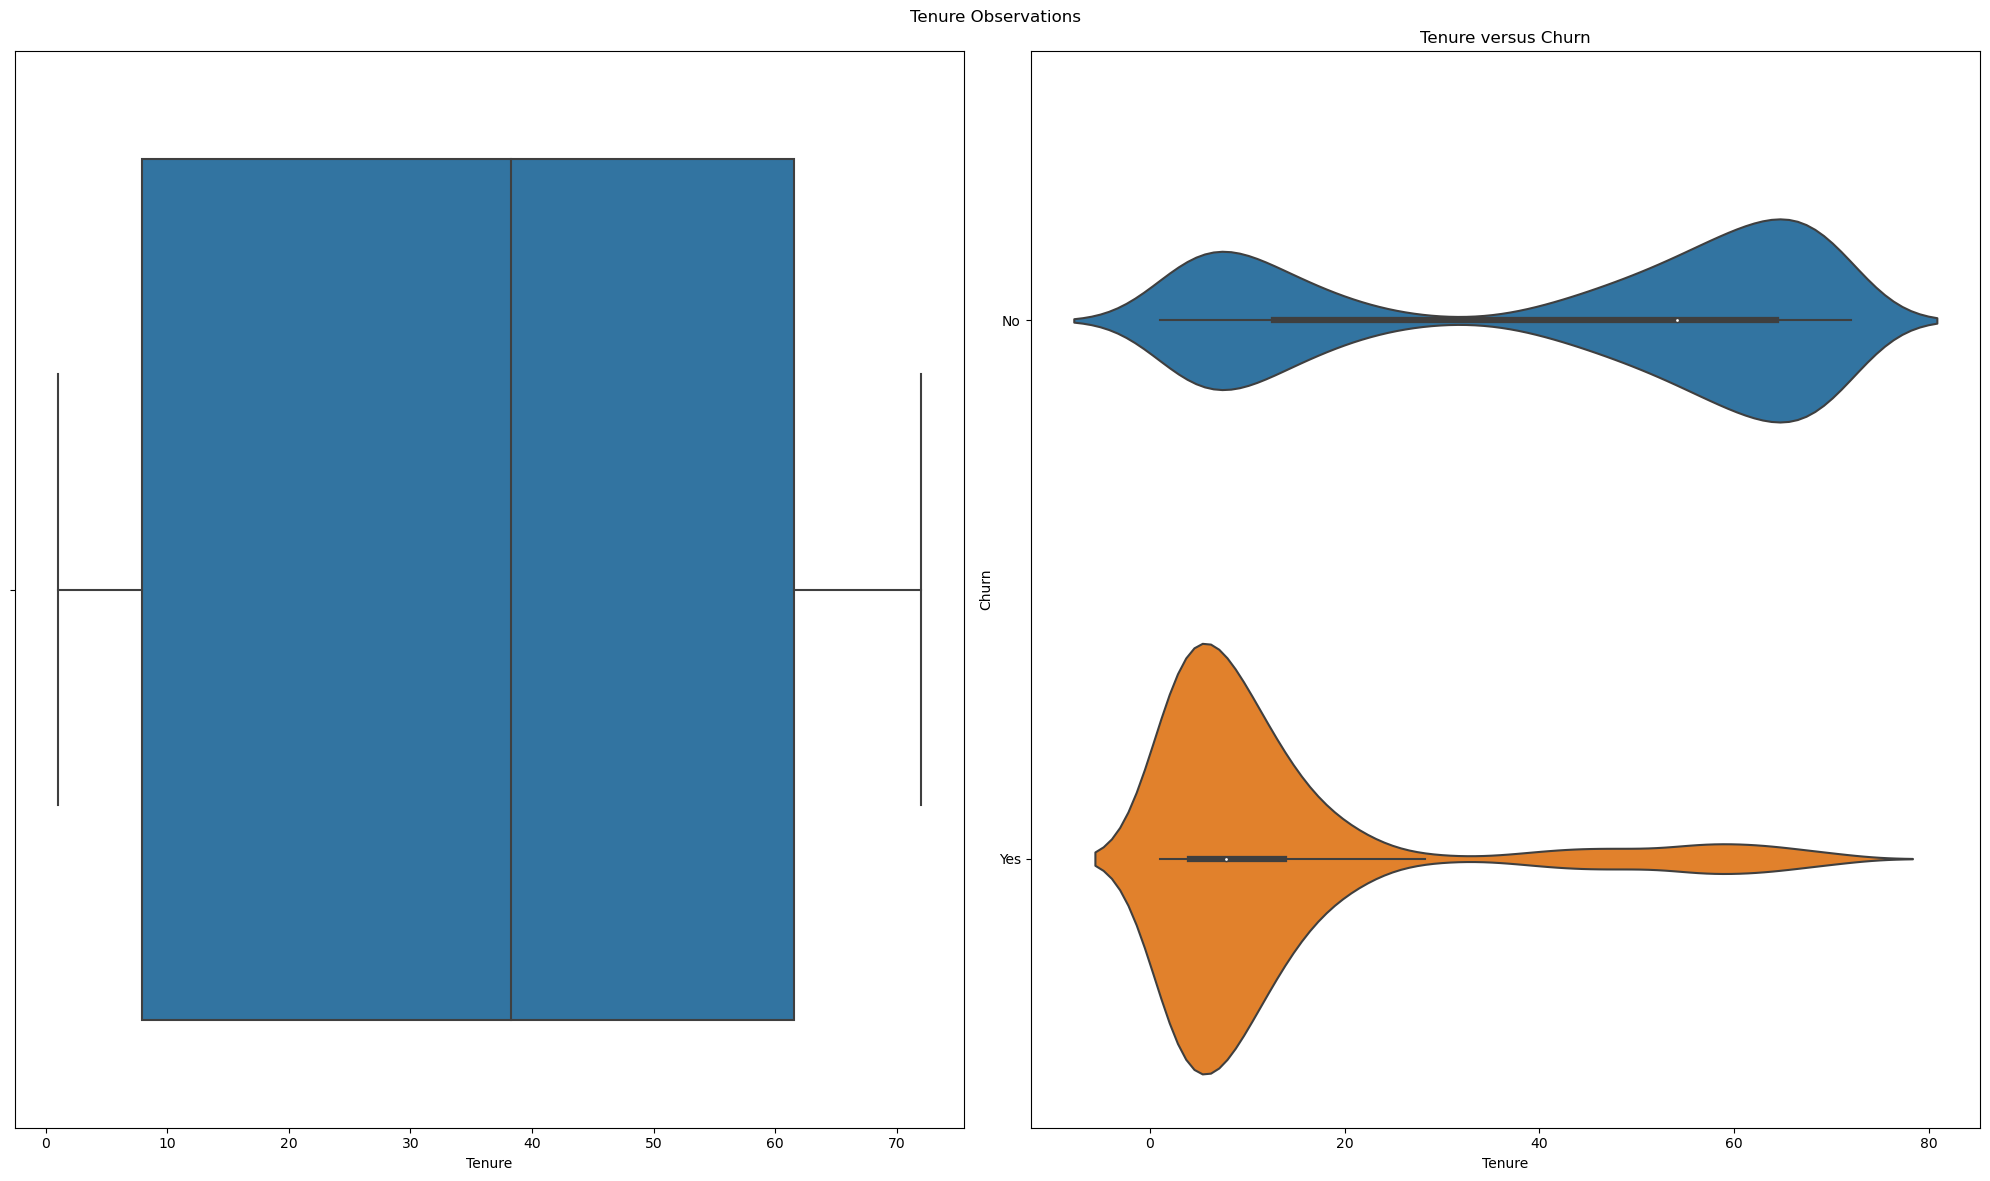

In [63]:
plt.figure(figsize = [20,12])
plt.suptitle("Tenure Observations")

# First subplot: Count plot
plt.subplot(1,2,1)
sns.boxplot(x = 'Tenure', data = df_logistic)


# Second subplot: Violin plot
plt.subplot(1, 2, 2)
plt.title("Tenure versus Churn")
sns.violinplot(data=df_logistic, x='Tenure', y ='Churn')
plt.xlabel("Tenure")
plt.ylabel("Churn")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

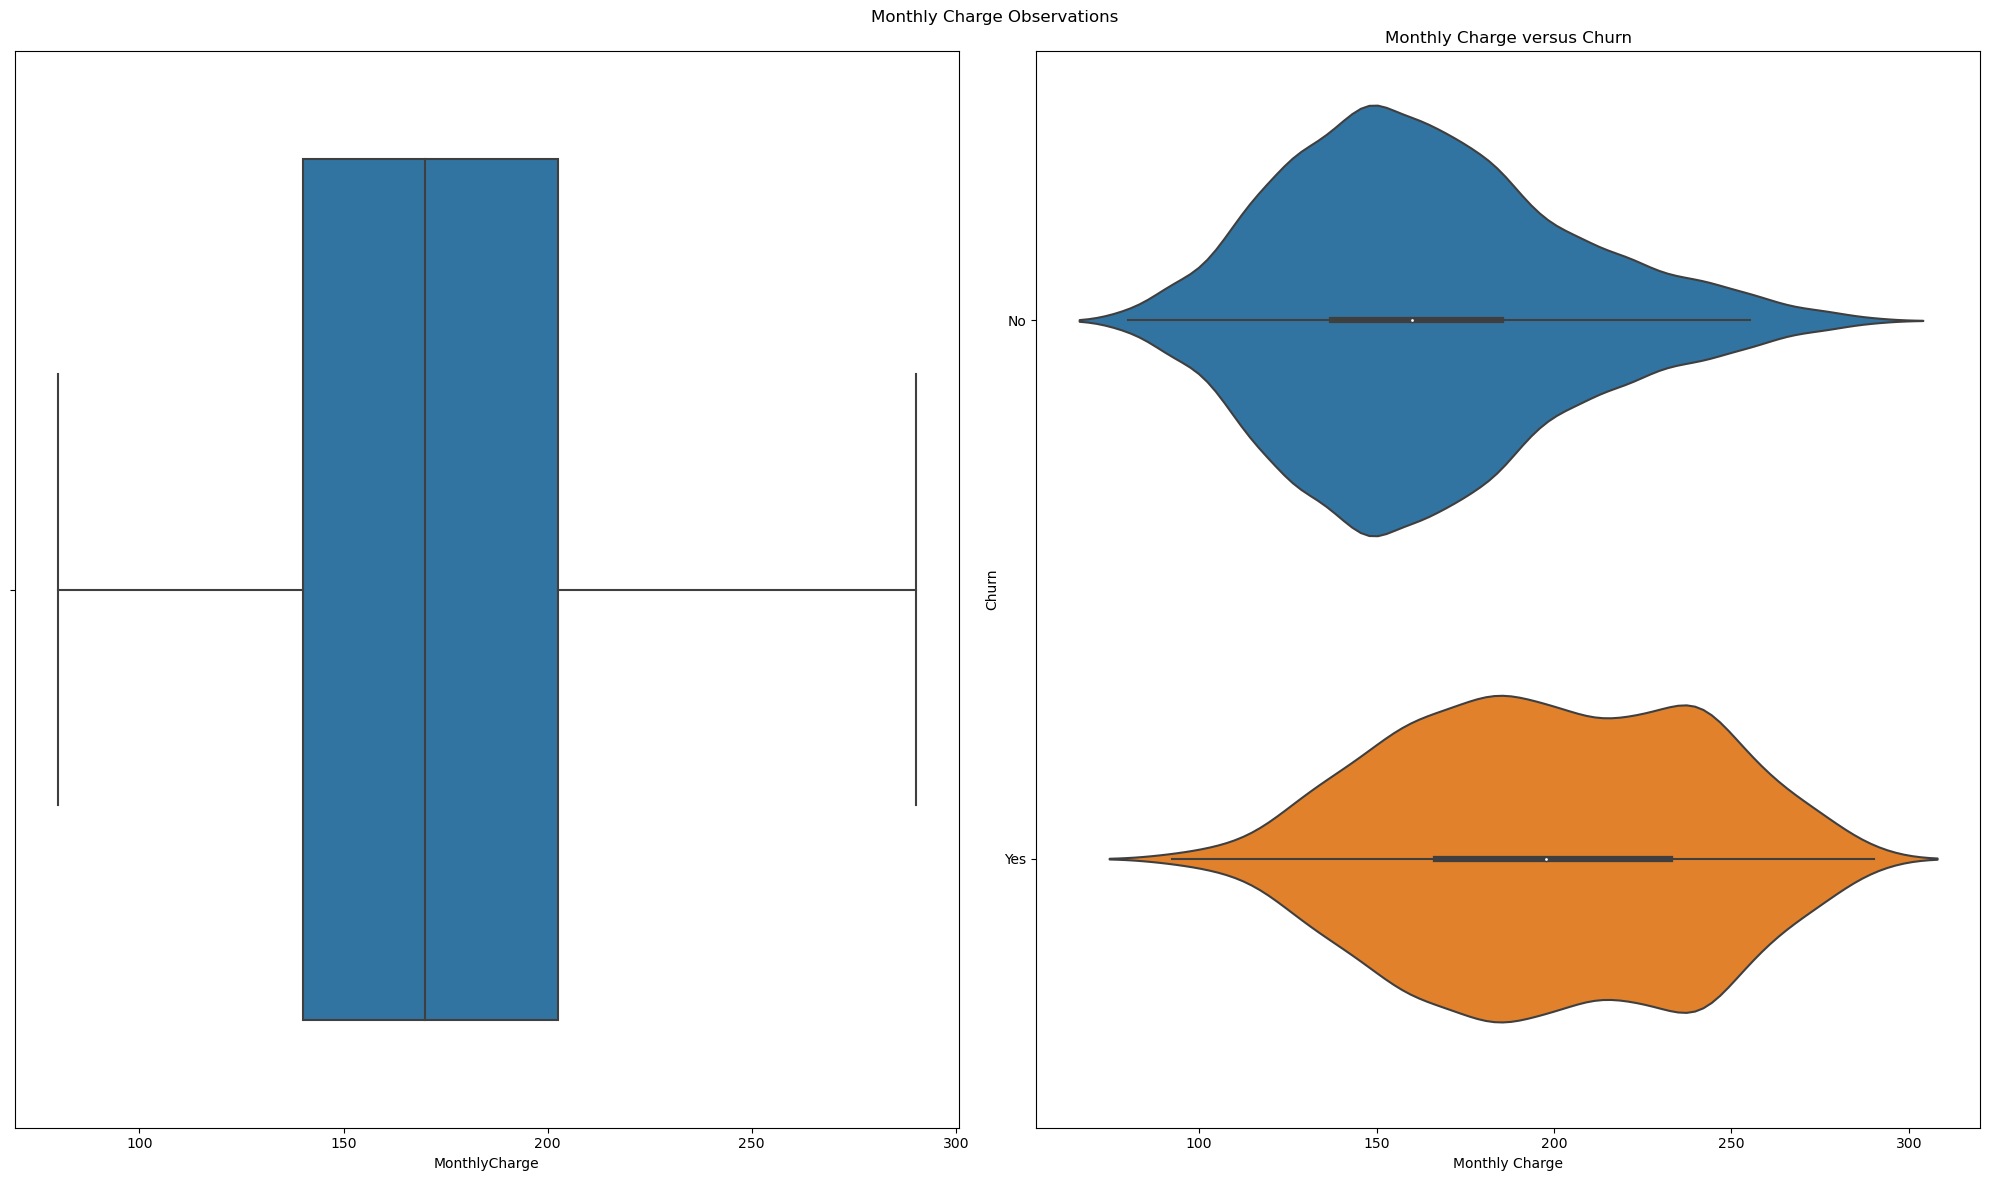

In [64]:
plt.figure(figsize = [20,12])
plt.suptitle("Monthly Charge Observations")

# First subplot: Count plot
plt.subplot(1,2,1)
sns.boxplot(x = 'MonthlyCharge', data = df_logistic)

# Second subplot: Count plot
plt.subplot(1, 2, 2)
plt.title("Monthly Charge versus Churn")
sns.violinplot(data=df_logistic, x='MonthlyCharge', y ='Churn')
plt.xlabel("Monthly Charge")
plt.ylabel("Churn")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

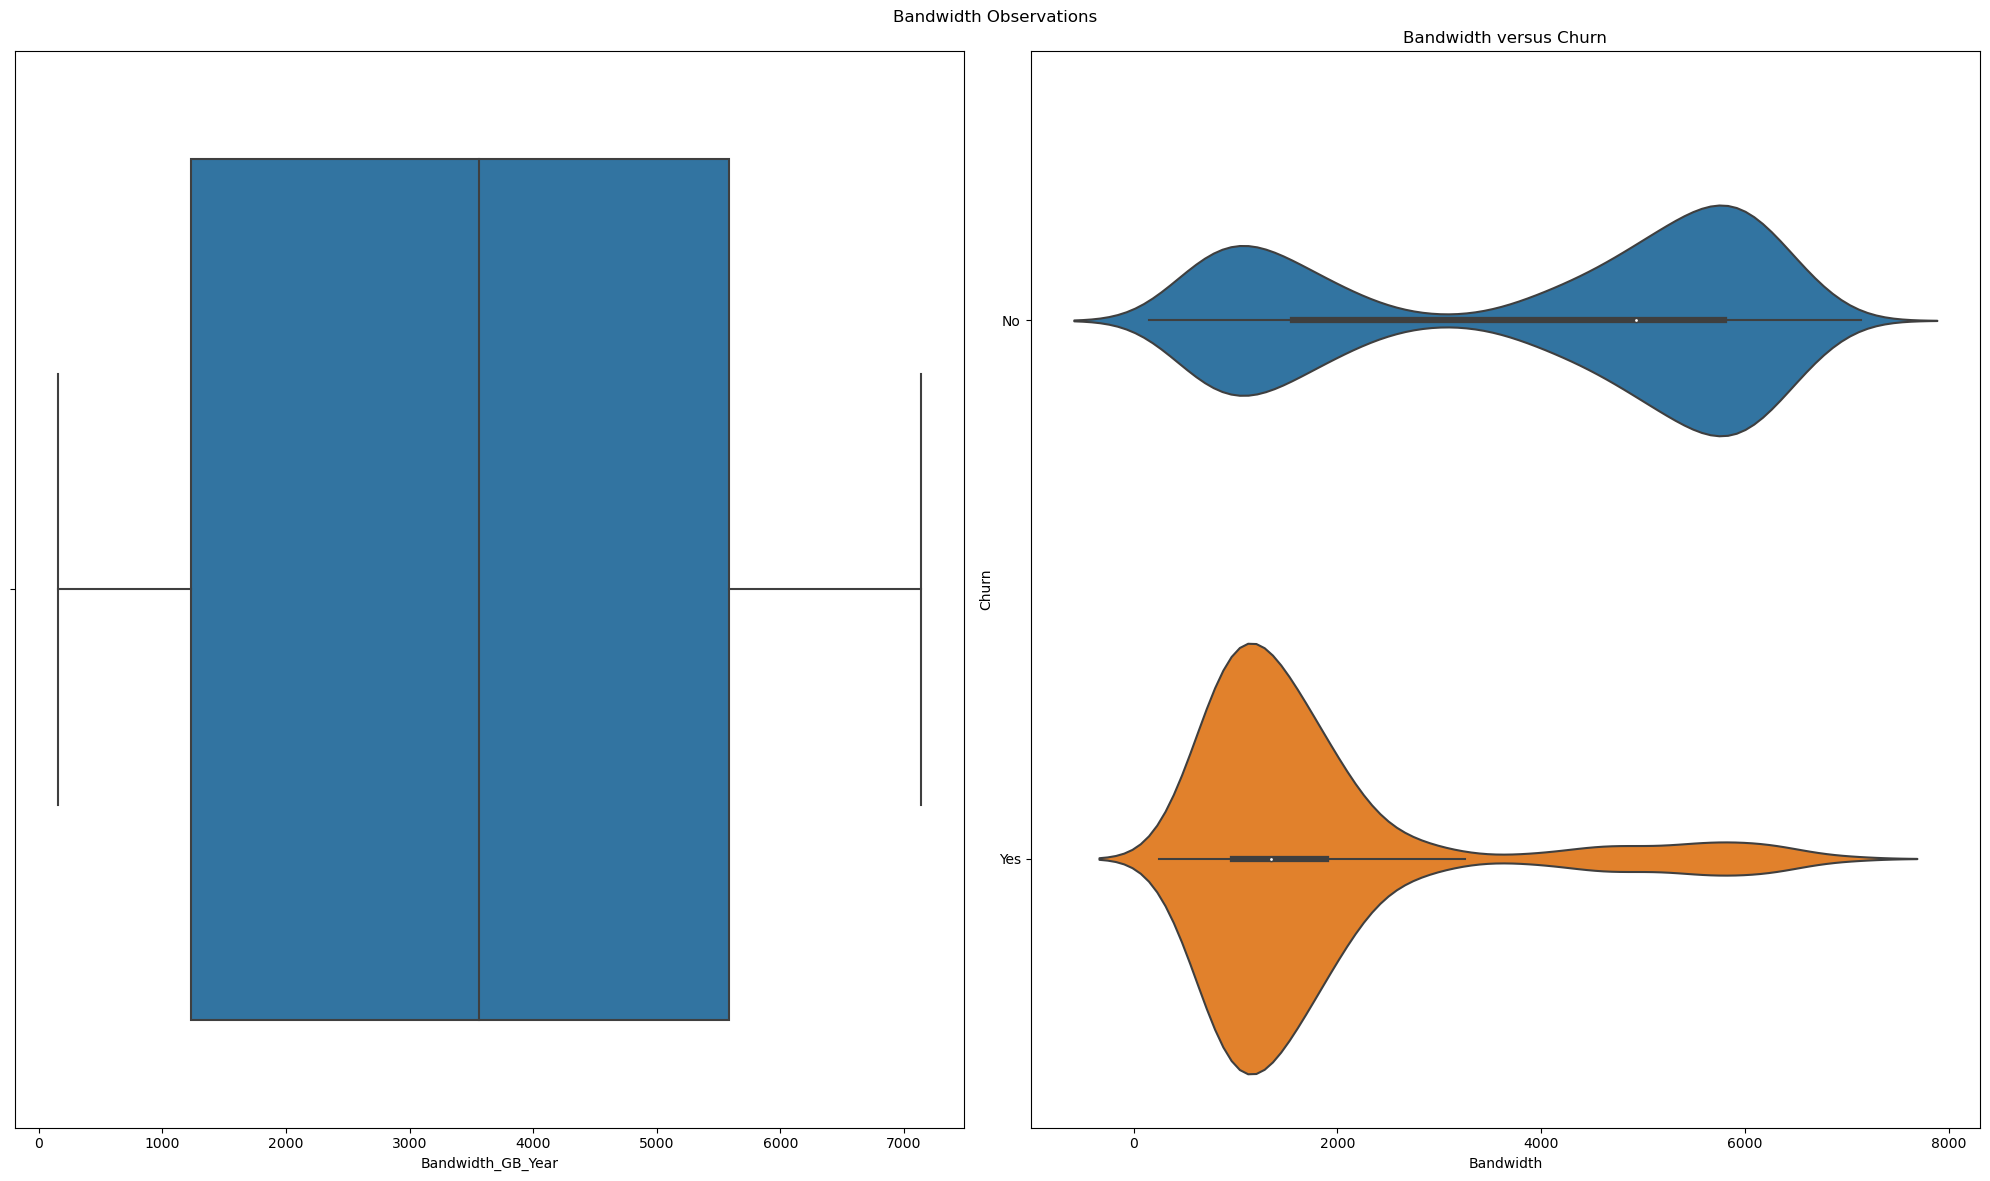

In [65]:
plt.figure(figsize = [20,12])
plt.suptitle("Bandwidth Observations")

# Plotting
plt.subplot(1,2,1)
sns.boxplot(x = 'Bandwidth_GB_Year', data = df_logistic)

# Second subplot: Count plot
plt.subplot(1, 2, 2)
plt.title("Bandwidth versus Churn")
sns.violinplot(data=df_logistic, x='Bandwidth_GB_Year', y ='Churn')
plt.xlabel("Bandwidth")
plt.ylabel("Churn")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Encoding Dummy Variables

In [66]:
# Establishing dependent variable as y
y = df_logistic['Churn']
df_logistic = df_logistic.drop(columns=['Churn'])

In [67]:
category_columns =[]
float_columns = []
int_columns = []

In [68]:
for column in df_logistic.columns:
    if df_logistic[column].dtype == 'object':
        category_columns.append(column)
    elif df_logistic[column].dtype == 'float':
        float_columns.append(column)
    elif df_logistic[column].dtype == 'int64':
        int_columns.append(column)
        
print(f'Category columns: {category_columns}')
print(f'Float columns: {float_columns}')
print(f'Integer columns: {int_columns}')

Category columns: ['Area', 'Marital', 'Gender', 'Tablet', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
Float columns: ['Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']
Integer columns: ['Population', 'Children', 'Age', 'Yearly_equip_failure']


Below is a brute force way of being able to use the variables in our model. Originally I was running into issues trying to pass boolean data types through the model, even though I have read that this should work.

We transform the boolean data points into 1/0 values for dummy variables and concatenate them with our other numeric data.

In [69]:
dummies = pd.get_dummies(df_logistic[category_columns], drop_first=True, dtype = 'int')

In [70]:
int_df = df_logistic.select_dtypes(include=['int64'])

In [71]:
float_df = df_logistic.select_dtypes(include=['float'])

In [72]:
df_clean = pd.concat([int_df, float_df, dummies, y], axis = 1)

In [73]:
df_clean['Churn'] = df_clean['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [74]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8367 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Population                   8367 non-null   int64  
 1   Children                     8367 non-null   int64  
 2   Age                          8367 non-null   int64  
 3   Yearly_equip_failure         8367 non-null   int64  
 4   Income                       8367 non-null   float64
 5   Outage_sec_perweek           8367 non-null   float64
 6   Tenure                       8367 non-null   float64
 7   MonthlyCharge                8367 non-null   float64
 8   Bandwidth_GB_Year            8367 non-null   float64
 9   Area_Suburban                8367 non-null   int32  
 10  Area_Urban                   8367 non-null   int32  
 11  Marital_Married              8367 non-null   int32  
 12  Marital_Never Married        8367 non-null   int32  
 13  Marital_Separated      

In [75]:
df_clean.columns

Index(['Population', 'Children', 'Age', 'Yearly_equip_failure', 'Income',
       'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Area_Suburban', 'Area_Urban', 'Marital_Married',
       'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed',
       'Gender_Male', 'Tablet_Yes', 'InternetService_Fiber Optic',
       'InternetService_None', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Churn'],
      dtype='object')

In [76]:
# Visually inspecting data to ensure correct transformations were made
df_clean.head(5)

,Population,Children,Age,Yearly_equip_failure,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year,Area_Suburban,...,Tablet_Yes,InternetService_Fiber Optic,InternetService_None,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Churn
0,38,0,68,1,28561.99,7.978323,6.795513,172.455519,904.536110,0,...,1,1,0,1,1,0,0,0,1,0
1,10446,1,27,1,21704.77,11.699080,1.156681,242.632554,800.982766,0,...,1,1,0,1,0,0,0,1,1,1
2,3735,4,50,1,9609.57,10.752800,15.754144,159.947583,2054.706961,0,...,0,0,0,0,0,0,0,0,1,0
3,13863,1,48,0,18925.23,14.913540,17.087227,119.956840,2164.579412,1,...,0,0,0,1,0,0,0,1,0,0
4,11352,0,83,1,40074.19,8.147417,1.670972,149.948316,271.493436,1,...,0,1,0,0,0,0,1,1,0,1


## C5: Cleaned Data File

The below code exports the dataframe to a CSV file that will be uploaded with this submission.

In [77]:
# Exporting dataframe to a new csv
df_clean.to_csv('d208_task2_cleaned.csv')

## D1: Initial Logistic Regression Model

Below is our first run through for an initial logistic regression model where we include our target variable, "Churn," and all of the remaining independent variables from our cleaned data set.

The independent variables we chose to inspect are:

1. Population
2. Children
3. Age
4. Yearly_equip_failure
5. Income
6. Outage_sec_perweek
7. Tenure
8. MonthlyCharge
9. Bandwidth_GB_Year
10. Area_Suburban
11. Area_Urban
12. Marital_Married
13. Marital_Never Married
14. Marital_Separated
15. Marital_Widowed
16. Gender_Male
17. Tablet_Yes
18. InternetService_Fiber Optic
19. InternetService_None
20. OnlineSecurity_Yes
21. OnlineBackup_Yes
22. DeviceProtection_Yes
23. TechSupport_Yes
24. StreamingTV_Yes
25. StreamingMovies_Yes

In [78]:
# Establishing target variable
y = df_clean['Churn']

In [79]:
# Establishing variables to evaluate
X = df_clean.drop(columns = ['Churn'])

In [80]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8367 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Population                   8367 non-null   int64  
 1   Children                     8367 non-null   int64  
 2   Age                          8367 non-null   int64  
 3   Yearly_equip_failure         8367 non-null   int64  
 4   Income                       8367 non-null   float64
 5   Outage_sec_perweek           8367 non-null   float64
 6   Tenure                       8367 non-null   float64
 7   MonthlyCharge                8367 non-null   float64
 8   Bandwidth_GB_Year            8367 non-null   float64
 9   Area_Suburban                8367 non-null   int32  
 10  Area_Urban                   8367 non-null   int32  
 11  Marital_Married              8367 non-null   int32  
 12  Marital_Never Married        8367 non-null   int32  
 13  Marital_Separated      

In [81]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Adding constant and running initial logistic regression model
X = sm.add_constant(X)
logit_model = sm.Logit(y,X)
lr = logit_model.fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.309438
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8367
Model:                          Logit   Df Residuals:                     8341
Method:                           MLE   Df Model:                           25
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.4674
Time:                        10:30:07   Log-Likelihood:                -2589.1
converged:                       True   LL-Null:                       -4861.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -4.6791      1.262     -3.709      0.000   

## D2: Justification for Model Reduction

For this assignment, I chose to simplify things and take the same approach that I did in Task 1. This will allow me to save time by re-implementing code I previously constructed.

The method I am re-implementing involves checking for variation inflation factors (VIF) first. We want to check for multicollinearity and remove any variables that indicate it may exist. One by one, we will remove the highest VIF variable until we reach a point where the remaining variables have acceptable values. This was made simple by following __[Analytics Vidhya: What is multicollinearity](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/)__.

We will then move into backward stepwise reduction where we eliminate variables one by one, taking away the variable with the highest p-value until all of the variables meet our significance level (p-value < 0.05). Once we have all of our variables within this threshold, we will be able to evaluate the validity of the model. Similar to the linear regression assignment, I learned more about this at __[Towards Data Science: Feature Selection](https://towardsdatascience.com/feature-selection-techniques-in-regression-model-26878fe0e24e)__.

NOTE: In the DataCamp courses associated with this course, it discussed using FORWARD stepwise selection instead of the method we chose here. With this in mind, our goal is to have the fewest amount of variables possible and the highest AUC score to ensure the accuracy of the model.

In [82]:
# Creating VIF function (from Task 1) to check for multicollinearity
def calc_vif(x):
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    
    return(vif)

In [83]:
# Dropping constant for VIF calculation
x_noconst = X.drop(columns=['const'])
calc_vif(x_noconst)

,variables,VIF
0,Population,1.590166
1,Children,5.756828
2,Age,18.375071
3,Yearly_equip_failure,1.408112
4,Income,3.002319
5,Outage_sec_perweek,12.864332
6,Tenure,6538.193749
7,MonthlyCharge,298.067502
8,Bandwidth_GB_Year,8295.358533
9,Area_Suburban,2.011214


In [84]:
# Dropping highest VIF above 10
x_noconst = x_noconst.drop(columns=['Bandwidth_GB_Year'])
calc_vif(x_noconst)

,variables,VIF
0,Population,1.580449
1,Children,2.104876
2,Age,6.940400
3,Yearly_equip_failure,1.400294
4,Income,2.905010
5,Outage_sec_perweek,10.793781
6,Tenure,2.658766
7,MonthlyCharge,53.146662
8,Area_Suburban,1.969582
9,Area_Urban,1.973458


In [85]:
# Dropping highest VIF above 10
x_noconst = x_noconst.drop(columns=['MonthlyCharge'])
calc_vif(x_noconst)

,variables,VIF
0,Population,1.570681
1,Children,2.082762
2,Age,6.362383
3,Yearly_equip_failure,1.395132
4,Income,2.828967
5,Outage_sec_perweek,9.108253
6,Tenure,2.619014
7,Area_Suburban,1.937587
8,Area_Urban,1.937714
9,Marital_Married,1.792973


In [86]:
# Dropping highest VIF above 10
x_noconst = x_noconst.drop(columns=['Outage_sec_perweek'])
calc_vif(x_noconst)

,variables,VIF
0,Population,1.559544
1,Children,2.051603
2,Age,5.878371
3,Yearly_equip_failure,1.387873
4,Income,2.764068
5,Tenure,2.559673
6,Area_Suburban,1.897373
7,Area_Urban,1.903217
8,Marital_Married,1.739656
9,Marital_Never Married,1.766232


In [87]:
# Removing high VIF columns from our variables to evaluate
X = X.drop(columns = ['Bandwidth_GB_Year', 'MonthlyCharge', 'Outage_sec_perweek'])

In [88]:
# Checking variables were dropped
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8367 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   const                        8367 non-null   float64
 1   Population                   8367 non-null   int64  
 2   Children                     8367 non-null   int64  
 3   Age                          8367 non-null   int64  
 4   Yearly_equip_failure         8367 non-null   int64  
 5   Income                       8367 non-null   float64
 6   Tenure                       8367 non-null   float64
 7   Area_Suburban                8367 non-null   int32  
 8   Area_Urban                   8367 non-null   int32  
 9   Marital_Married              8367 non-null   int32  
 10  Marital_Never Married        8367 non-null   int32  
 11  Marital_Separated            8367 non-null   int32  
 12  Marital_Widowed              8367 non-null   int32  
 13  Gender_Male            

In [89]:
# Running model
logit_model = sm.Logit(y,X)
lr = logit_model.fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.327466
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8367
Model:                          Logit   Df Residuals:                     8344
Method:                           MLE   Df Model:                           22
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.4364
Time:                        10:30:08   Log-Likelihood:                -2739.9
converged:                       True   LL-Null:                       -4861.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.5339      0.177     -8.672      0.000   

Here we begin our reduction process by searching for the highest p-value. The code below is used to simplify checking the model results and allowing us to better match the variable and p-value that should be removed.

In [90]:
# Locating highest p-value
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.99


In [91]:
# Dropping highest p-value and running model
X = X.drop(columns=['Population'])
logit_model = sm.Logit(y,X)
lr = logit_model.fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.327466
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8367
Model:                          Logit   Df Residuals:                     8345
Method:                           MLE   Df Model:                           21
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.4364
Time:                        10:30:09   Log-Likelihood:                -2739.9
converged:                       True   LL-Null:                       -4861.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.5336      0.175     -8.755      0.000   

In [92]:
# Locating highest p-value
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.778


In [93]:
# Dropping highest p-value and running model
X = X.drop(columns=['Marital_Married'])
logit_model = sm.Logit(y,X)
lr = logit_model.fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.327471
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8367
Model:                          Logit   Df Residuals:                     8346
Method:                           MLE   Df Model:                           20
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.4363
Time:                        10:30:09   Log-Likelihood:                -2739.9
converged:                       True   LL-Null:                       -4861.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.5188      0.167     -9.092      0.000   

In [94]:
# Locating highest p-value
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.631


In [95]:
# Dropping highest p-value and running model
X = X.drop(columns=['Yearly_equip_failure'])
logit_model = sm.Logit(y,X)
lr = logit_model.fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.327485
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8367
Model:                          Logit   Df Residuals:                     8347
Method:                           MLE   Df Model:                           19
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.4363
Time:                        10:30:09   Log-Likelihood:                -2740.1
converged:                       True   LL-Null:                       -4861.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.5296      0.166     -9.240      0.000   

In [96]:
# Locating highest p-value
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.589


In [97]:
# Dropping highest p-value and running model
X = X.drop(columns=['Income'])
logit_model = sm.Logit(y,X)
lr = logit_model.fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.327502
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8367
Model:                          Logit   Df Residuals:                     8348
Method:                           MLE   Df Model:                           18
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.4363
Time:                        10:30:09   Log-Likelihood:                -2740.2
converged:                       True   LL-Null:                       -4861.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.5004      0.156     -9.594      0.000   

In [98]:
# Locating highest p-value
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.515


In [99]:
# Dropping highest p-value and running model
X = X.drop(columns=['Area_Urban'])
logit_model = sm.Logit(y,X)
lr = logit_model.fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.327527
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8367
Model:                          Logit   Df Residuals:                     8349
Method:                           MLE   Df Model:                           17
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.4362
Time:                        10:30:09   Log-Likelihood:                -2740.4
converged:                       True   LL-Null:                       -4861.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.4730      0.151     -9.785      0.000   

In [100]:
# Locating highest p-value
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.412


In [101]:
# Dropping highest p-value and running model
X = X.drop(columns=['Marital_Never Married'])
logit_model = sm.Logit(y,X)
lr = logit_model.fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.327568
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8367
Model:                          Logit   Df Residuals:                     8350
Method:                           MLE   Df Model:                           16
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.4362
Time:                        10:30:09   Log-Likelihood:                -2740.8
converged:                       True   LL-Null:                       -4861.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.4976      0.148    -10.150      0.000   

In [102]:
# Locating highest p-value
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.321


In [103]:
# Dropping highest p-value and running model
X = X.drop(columns=['Children'])
logit_model = sm.Logit(y,X)
lr = logit_model.fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.327627
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8367
Model:                          Logit   Df Residuals:                     8351
Method:                           MLE   Df Model:                           15
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.4361
Time:                        10:30:09   Log-Likelihood:                -2741.3
converged:                       True   LL-Null:                       -4861.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.5308      0.144    -10.650      0.000   

In [104]:
# Locating highest p-value
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.295


In [105]:
# Dropping highest p-value and running model
X = X.drop(columns=['Tablet_Yes'])
logit_model = sm.Logit(y,X)
lr = logit_model.fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.327692
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8367
Model:                          Logit   Df Residuals:                     8352
Method:                           MLE   Df Model:                           14
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.4360
Time:                        10:30:09   Log-Likelihood:                -2741.8
converged:                       True   LL-Null:                       -4861.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.5542      0.142    -10.946      0.000   

In [106]:
# Locating highest p-value
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.213


In [107]:
# Dropping highest p-value and running model
X = X.drop(columns=['Marital_Separated'])
logit_model = sm.Logit(y,X)
lr = logit_model.fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.327785
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8367
Model:                          Logit   Df Residuals:                     8353
Method:                           MLE   Df Model:                           13
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.4358
Time:                        10:30:09   Log-Likelihood:                -2742.6
converged:                       True   LL-Null:                       -4861.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.5280      0.140    -10.888      0.000   

In [108]:
# Locating highest p-value
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.202


In [109]:
# Dropping highest p-value and running model
X = X.drop(columns=['Area_Suburban'])
logit_model = sm.Logit(y,X)
lr = logit_model.fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.327882
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8367
Model:                          Logit   Df Residuals:                     8354
Method:                           MLE   Df Model:                           12
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.4356
Time:                        10:30:09   Log-Likelihood:                -2743.4
converged:                       True   LL-Null:                       -4861.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.5582      0.138    -11.257      0.000   

In [110]:
# Locating highest p-value
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.133


In [111]:
# Dropping highest p-value and running model
X = X.drop(columns=['Marital_Widowed'])
logit_model = sm.Logit(y,X)
lr = logit_model.fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.328017
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8367
Model:                          Logit   Df Residuals:                     8355
Method:                           MLE   Df Model:                           11
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.4354
Time:                        10:30:09   Log-Likelihood:                -2744.5
converged:                       True   LL-Null:                       -4861.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.5315      0.137    -11.161      0.000   

In [112]:
# Locating highest p-value
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.081


In [113]:
# Dropping highest p-value and running model
X = X.drop(columns=['Age'])
logit_model = sm.Logit(y,X)
lr = logit_model.fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.328199
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8367
Model:                          Logit   Df Residuals:                     8356
Method:                           MLE   Df Model:                           10
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.4351
Time:                        10:30:09   Log-Likelihood:                -2746.0
converged:                       True   LL-Null:                       -4861.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.3836      0.107    -12.876      0.000   

In [114]:
# Locating highest p-value
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.062


In [115]:
# Dropping highest p-value and running model
X = X.drop(columns=['OnlineSecurity_Yes'])
logit_model = sm.Logit(y,X)
lr = logit_model.fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.328407
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8367
Model:                          Logit   Df Residuals:                     8357
Method:                           MLE   Df Model:                            9
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.4347
Time:                        10:30:09   Log-Likelihood:                -2747.8
converged:                       True   LL-Null:                       -4861.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.4253      0.105    -13.547      0.000   

In [116]:
# Locating highest p-value
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.015


In [117]:
# Inspecting final set of variables
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8367 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   const                        8367 non-null   float64
 1   Tenure                       8367 non-null   float64
 2   Gender_Male                  8367 non-null   int32  
 3   InternetService_Fiber Optic  8367 non-null   int32  
 4   InternetService_None         8367 non-null   int32  
 5   OnlineBackup_Yes             8367 non-null   int32  
 6   DeviceProtection_Yes         8367 non-null   int32  
 7   TechSupport_Yes              8367 non-null   int32  
 8   StreamingTV_Yes              8367 non-null   int32  
 9   StreamingMovies_Yes          8367 non-null   int32  
dtypes: float64(2), int32(8)
memory usage: 457.6 KB


## D3: Final Reduced Model

After performing the backwards stepwise reduction, we were able to reduce our model to nine variables comprised of one continuous and eight categorical variables.

In [118]:
# Final reduced model and results
logit_model = sm.Logit(y,X)
lr = logit_model.fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.328407
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8367
Model:                          Logit   Df Residuals:                     8357
Method:                           MLE   Df Model:                            9
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.4347
Time:                        10:30:09   Log-Likelihood:                -2747.8
converged:                       True   LL-Null:                       -4861.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.4253      0.105    -13.547      0.000   

## E1: Data Analysis Process for Evaluation

In order to evaluate the effectiveness of our model, there a couple things that we are able to do. First we are going to calculate the AUC scores for each independent variable and compare our training data with our test data.

The AUC (Area Under the ROC Curve) measures the ability of a variable to predict the result of a binary target. In this case it was our "Churn," variable. We will plot the AUC of each of our variables individually to see how different they are between our training and test data.

We can then calculate the AUC for the model as a whole. 1 is the highest value possible and indicates a perfect ability to predict the binary target. The closer we get to this value, the better the model should perform.

In [119]:
features = X.columns

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# Creating confusion matrix to assess accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_prob = lr.predict(X)

In [121]:
# Calculating AUC scores for each feature
logreg = LogisticRegression()
auc_scores_train = []
auc_scores_test = []

for feature in features:
    # Train logistic regression model with only one feature
    logreg.fit(X_train[[feature]], y_train)
    
    # Predict probabilities
    y_train_prob = logreg.predict_proba(X_train[[feature]])[:, 1]
    y_test_prob = logreg.predict_proba(X_test[[feature]])[:, 1]
    
    # Calculate AUC scores for train and test sets
    auc_train = roc_auc_score(y_train, y_train_prob)
    auc_test = roc_auc_score(y_test, y_test_prob)
    
    auc_scores_train.append(auc_train)
    auc_scores_test.append(auc_test)

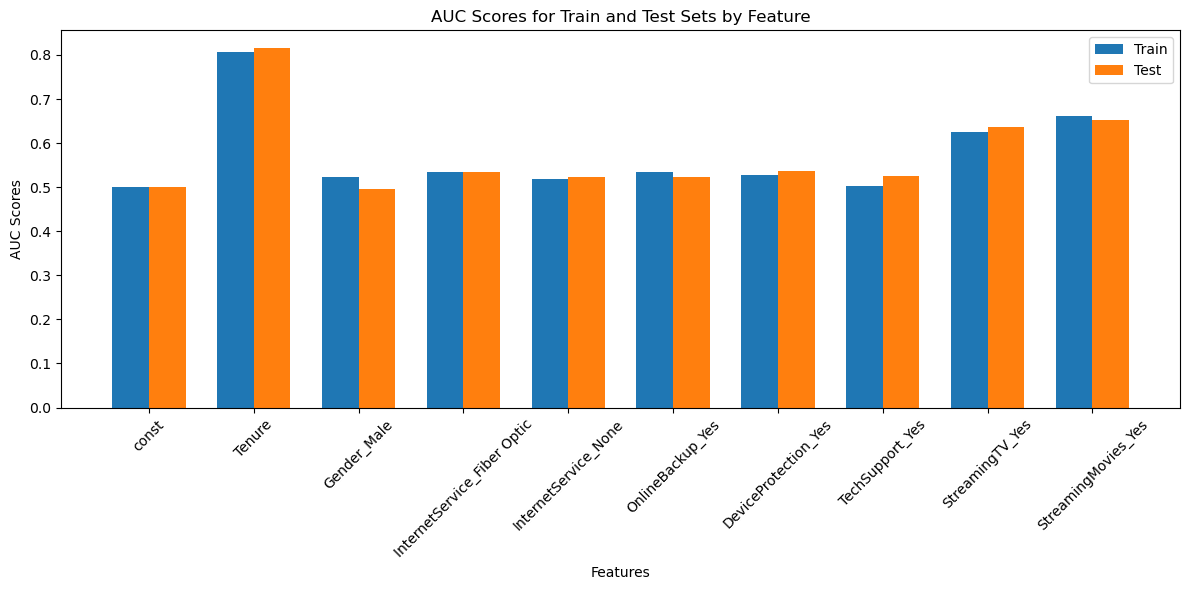

In [122]:
# Plot the difference between AUC scores for each feature
x = np.arange(len(features))
width = 0.35

plt.figure(figsize=(12, 6))
bar1 = plt.bar(x - width/2, auc_scores_train, width, label='Train')
bar2 = plt.bar(x + width/2, auc_scores_test, width, label='Test')

plt.xlabel('Features')
plt.ylabel('AUC Scores')
plt.title('AUC Scores for Train and Test Sets by Feature')
plt.xticks(x, features, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

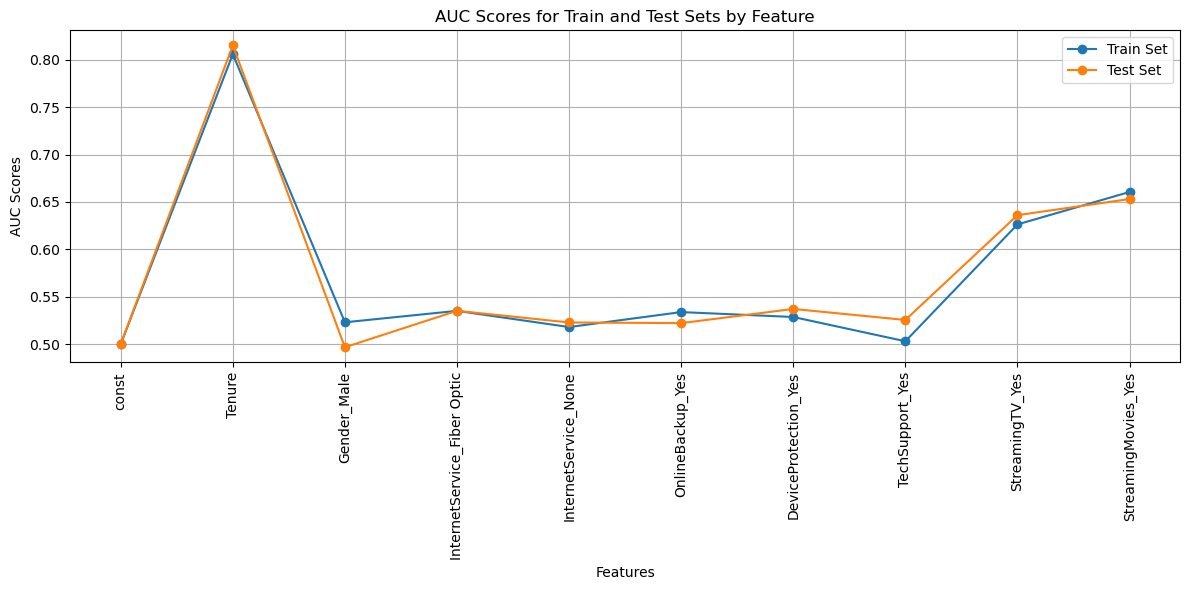

In [123]:
# Plot the difference between AUC scores for each feature (line graph)
plt.figure(figsize=(12, 6))

plt.plot(features, auc_scores_train, marker='o', linestyle='-', label='Train Set')
plt.plot(features, auc_scores_test, marker='o', linestyle='-', label='Test Set')

plt.xlabel('Features')
plt.ylabel('AUC Scores')
plt.title('AUC Scores for Train and Test Sets by Feature')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

As can be seen above, there are very minute differences between the test and train data sets. It looks like Tenure is our highest AUC score among the independent variables. This would indicate this is our strongest indicator for predicting whether or not a customer is likely to churn.

This intuitively makes sense as someone with longstanding quality service will probably continue with that service. It also would minimize the effect of one or two mishaps and limit the desire to "jump ship," to another provider when there are random issues with the company.

In [124]:
# Getting AUC score for the whole model
auc_score = roc_auc_score(y, y_prob)
print(auc_score)

0.9095043309473291


The AUC score for the model as a whole is 0.91 which is very high in respect to 1 being a perfect model. With that, we can assume that we have done a solid job reducing variables from the model with the goal of predicting a customer's likelihood to churn. 

We also were required to produce an accuracy score the model to mathematically show the likelihood of our model being correct. The below code was made very simple with the help of __[Stack Overflow: Logistic Regression Accuracy](https://stackoverflow.com/questions/47437893/how-to-calculate-logistic-regression-accuracy)__.

In [125]:
score = accuracy_score(y_test,y_pred)
print(f'Accuracy score: {score}')

Accuracy score: 0.8414974113898845


In [126]:
# Printing numerical array of confusion matrix
final_matrix = confusion_matrix(y_test, y_pred)
print(final_matrix)

[[1695  146]
 [ 252  418]]


As part of the requirements for this assignment, we also had to create a confusion matrix to cover the True Negatives and Positives, as well as False Negatives and Positives. We are printed a 2x2 array of values to show us where the model was accurately able to predict a result based on our training and test data.

In order to create the matrix numerically, as well as print out the visualizations, I referred to __[Medium: Confusion Matrix](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)__.

<Axes: >

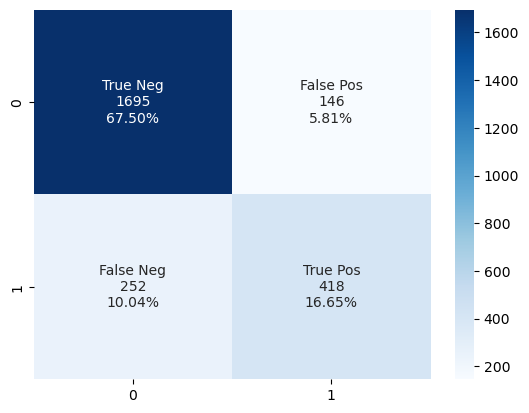

In [127]:
# Plotting heatmap of confusion matrix
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in final_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in final_matrix.flatten()/np.sum(final_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(final_matrix, annot=labels, fmt='', cmap='Blues')

In [128]:
# Printing variable coefficients
lr.params

const                         -1.425262
Tenure                        -0.075664
Gender_Male                    0.165788
InternetService_Fiber Optic   -0.859339
InternetService_None          -0.957316
OnlineBackup_Yes               0.519784
DeviceProtection_Yes           0.256841
TechSupport_Yes                0.181177
StreamingTV_Yes                1.943676
StreamingMovies_Yes            2.295294
dtype: float64

In [129]:
print(np.exp(-0.075664))

0.9271276691275674


In [130]:
# Calculating odds-ratio
coefficients = lr.params[1:]
features = pd.DataFrame(features[1:])
odds_ratios = np.exp(coefficients)

print(np.round(odds_ratios,3))

Tenure                         0.927
Gender_Male                    1.180
InternetService_Fiber Optic    0.423
InternetService_None           0.384
OnlineBackup_Yes               1.682
DeviceProtection_Yes           1.293
TechSupport_Yes                1.199
StreamingTV_Yes                6.984
StreamingMovies_Yes            9.927
dtype: float64


In [131]:
# Calculating percent change based on odds ratios
percent_change = np.round(((odds_ratios)-1)*100,3)
print(percent_change)

Tenure                          -7.287
Gender_Male                     18.032
InternetService_Fiber Optic    -57.656
InternetService_None           -61.608
OnlineBackup_Yes                68.166
DeviceProtection_Yes            29.284
TechSupport_Yes                 19.863
StreamingTV_Yes                598.438
StreamingMovies_Yes            892.735
dtype: float64


In [132]:
# Printing percents in decimal form for equation in F1
dec_perc_change = np.round(((odds_ratios)-1),3)
print(dec_perc_change)

Tenure                        -0.073
Gender_Male                    0.180
InternetService_Fiber Optic   -0.577
InternetService_None          -0.616
OnlineBackup_Yes               0.682
DeviceProtection_Yes           0.293
TechSupport_Yes                0.199
StreamingTV_Yes                5.984
StreamingMovies_Yes            8.927
dtype: float64


## F1: Results of Analysis

Based on some the metrics calculated above, we seem to have found a model that is fairly good at predicting whether or not a customer is likely to churn or not. 

#### Equation

y = -1.4253 - 0.073(Tenure) + 0.180(Gender_Male) - 0.577(InternetService_FiberOptic) - 0.616(InternetService_None) + 0.682(OnlineBackup_Yes) + 0.293(DeviceProtection_Yes) + 0.199(TechSupport_Yes) + 5.984(StreamingTV_Yes) + 8.927(StreamingMovies_Yes)

#### Interpretation of Coefficients

1. For every month increase of a customer, the odds of a customer churning **decreases** by 7.287%
2. For each customer that is a male, the odds of a customer churning **increases** by 18.032%
3. For each customer that uses Fiber Optic internet service, the odds of a customer churning **decreases** by 57.7%
4. For each customer that does not use internet service, the odds of a customer churning **decreases** by 61.6%
5. For each customer that has online backup add-on services, the odds of a customer churning **increases** by 68.2%
6. For each customer that has device protection, the odds of a customer churning **increases** by 29.3%
7. For each customer that has tech support, the odds of a customer churning **increases** by 19.9%
8. For each customer that has TV streaming services, the odds of a customer churning **increases** by 598%
9. For each customer that has Movie streaming services, the odds of a customer churning **increases** by 893%

#### Statistical Significance of the Model

In regards to the statistical significance of the model, our LLR p-value was 0.000. This is below our significance level of 0.05 which indicates it is statistically significant and the variables in the reduced model were not included by random chance.

Based on the other metrics we calculated above (AUC = 0.90, accuracy score = 0.84) it seems to do a solid job in determining whether or not a customer will churn. I was surprised to see such high increases in the odds of people with add-on services churning. From an outsider's perspective, these seem like the services that would ultimately keep a customer around. However, maybe the customers do not see the value in the services and simply see a high monthly bill and choose to go somewhere else thinking they will get a better deal.

#### Limitations on Data Analysis

As with Task 1, the sample size of genders was rather small in regards to people identifying as non-binary. As a result, we did not include them in this analysis. I don't necessarily see how gender would have a large impact as is because almost everyone needs service of some sort for communication and work in today's day and age, but this was one factor.

Another limitation of the analysis, somewhat by choice, was that we did not include the survey scores from the customers in regards to their expectations with customer service. Even if we did include them, these are just the customers' opinions on what is important to them. It is not how they feel the customer service team DID when an issue did arise. There may be some merit to conducting another interview after customers reach out for assistance to assess the quality of customer service each customer is getting.


## F2: Recommendation to the Business

Based on the above model we have created and the resulting parameters we evaluated, it seems that the company's number one goal should be to increase tenure. Tenure had the biggest logical impact based on AUC score as to why a customer would **NOT** churn.

Obviously this is the entire goal of the company, but based on the model my suggestion would be to limit the number of add-on services a customer buys until they have spent ample time with the company. The company should offer promotional add-on services for free, and develop a good working relationship with the customer before charging them for additional things. This could potentially cause a customer to leave at the end of the promotional period and an increase in their monthly bill, but based on the model it appears that add-ons such as TV and Movie streaming are what lead customers to leave the company for another provider. Maybe the customers have not spent enough time with this company to have experienced service at a level that would warrant loyalty to the company.

## G: Panopto Video Recording

__[Panopto Video Recording: D208 Task 2 Logistic Regression](https://wgu.hosted.panopto.com/Panopto/Pages/Capture.aspx?folderId=c5e28fac-6ad0-4e87-b856-ac720189cb27)__

## H: Web Sources Used

1. __[Analytics Vidhya: What is multicollinearity](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/)__

2. __[Towards Data Science: Feature Selection](https://towardsdatascience.com/feature-selection-techniques-in-regression-model-26878fe0e24e)__

3. __[Sharpsight Labs: Panda's Get Dummies](https://www.sharpsightlabs.com/blog/pandas-get-dummies/)__

4. __[Stack Overflow: Logistic Regression Accuracy](https://stackoverflow.com/questions/47437893/how-to-calculate-logistic-regression-accuracy)__

5. __[Medium: Confusion Matrix](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)__

## I: Other Source

1. __[DataCamp Videos from WGU Courseware](https://app.datacamp.com/learn/custom-tracks/custom-d208-predictive-modeling)__

2. Code from previous submissions for D206 and D207